## Limpieza de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN


# Ruta del dataset (ajústala si lo subes a Colab)
df = pd.read_csv("Bank Customer Churn Prediction.csv")

df.shape, df.head()

((10000, 12),
    customer_id  credit_score country  gender  age  tenure    balance  \
 0     15634602           619  France  Female   42       2       0.00   
 1     15647311           608   Spain  Female   41       1   83807.86   
 2     15619304           502  France  Female   42       8  159660.80   
 3     15701354           699  France  Female   39       1       0.00   
 4     15737888           850   Spain  Female   43       2  125510.82   
 
    products_number  credit_card  active_member  estimated_salary  churn  
 0                1            1              1         101348.88      1  
 1                1            0              1         112542.58      0  
 2                3            1              0         113931.57      1  
 3                2            0              0          93826.63      0  
 4                1            1              1          79084.10      0  )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# Valores nulos por columna
df.isnull().sum()

# Comprobar duplicados
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

**texto en negrita**## Resumen de la Limpieza de Datos

En esta sección, se realizaron los siguientes pasos para la limpieza y preparación inicial de los datos:

1.  **Carga del Dataset**: Se cargó el archivo `Bank Customer Churn Prediction (1).csv` en un DataFrame de Pandas llamado `df`.
2.  **Exploración Inicial**: Se verificaron las dimensiones del DataFrame (`df.shape`) y se mostraron las primeras filas (`df.head()`) para una primera inspección de los datos.
3.  **Información General**: Se utilizó `df.info()` para obtener un resumen conciso del DataFrame, incluyendo el tipo de dato de cada columna y el número de valores no nulos, lo que permitió identificar la presencia de valores nulos y la necesidad de posibles conversiones de tipos.
4.  **Verificación de Nulos**: Se calculó la suma de valores nulos por columna (`df.isnull().sum()`) para asegurar que no hubiera datos faltantes.
5.  **Verificación de Duplicados**: Se comprobó la existencia de filas duplicadas en el dataset (`df.duplicated().sum()`), confirmando que no había registros idénticos.

## Tratamiento de valores categoricos

In [ ]:
print("Variables Categóricas y sus valores únicos:")
for column in df.select_dtypes(include='object').columns:
    print(f"\nColumna '{column}':")
    print(df[column].unique())

Variables Categóricas y sus valores únicos:

Columna 'country':
['France' 'Spain' 'Germany']

Columna 'gender':
['Female' 'Male']


In [ ]:
df_encoded_all = pd.get_dummies(df, columns=["country"], drop_first=False)
df_encoded_all = pd.get_dummies(df_encoded_all, columns=["gender"], drop_first=False)
df_encoded_all.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [ ]:
df_encoded = pd.get_dummies(df, columns=["country", "gender"], drop_first=True)
df_encoded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_Germany   10000 non-null  bool   
 11  country_Spain     10000 non-null  bool   
 12  gender_Male       10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


## Explicación de la Transformación de Variables Categóricas

Para el tratamiento de las variables categóricas (`country` y `gender`), hemos utilizado la técnica de **One-Hot Encoding** con la función `pd.get_dummies()` de Pandas. La elección del parámetro `drop_first` ha sido estratégica según el objetivo:

1.  **Para la Visualización de la Matriz de Correlación (`drop_first=False`)**:
    *   Cuando generamos la matriz de correlación de forma gráfica (heatmap), configuramos `drop_first=False` para la variable `country`. Esto significa que se creó una columna dummy para cada categoría (`country_France`, `country_Germany`, `country_Spain`).
    *   **Propósito**: Se hizo de esta manera para poder observar explícitamente las correlaciones de cada país con las demás variables (incluida la variable objetivo `churn`). Visualmente, esto permite una inspección más directa de la influencia individual de cada categoría, incluso si introduce cierta redundancia.

2.  **Para el Resto de Pasos (Modelado) (`drop_first=True`)**:
    *   Para los pasos subsiguientes, especialmente cuando se construyan modelos predictivos, utilizaremos `drop_first=True` (como se hizo para `gender` y se hará para `country` en los DataFrames finales para modelado).
    *   **Propósito**: Al establecer `drop_first=True`, se elimina una de las columnas dummy para cada variable categórica. Por ejemplo, si tenemos `country_France`, `country_Germany`, `country_Spain`, al usar `drop_first=True` se eliminará una (ej. `country_France`), dejando solo `country_Germany` y `country_Spain`. Si ambas son 0, se infiere que es 'France'.
    *   **Razón**: Esto se hace para **evitar el problema de la multicolinealidad** en los modelos. La multicolinealidad ocurre cuando las variables predictoras están altamente correlacionadas entre sí, lo que puede llevar a estimaciones de coeficientes inestables o difíciles de interpretar en modelos lineales.

# EDA

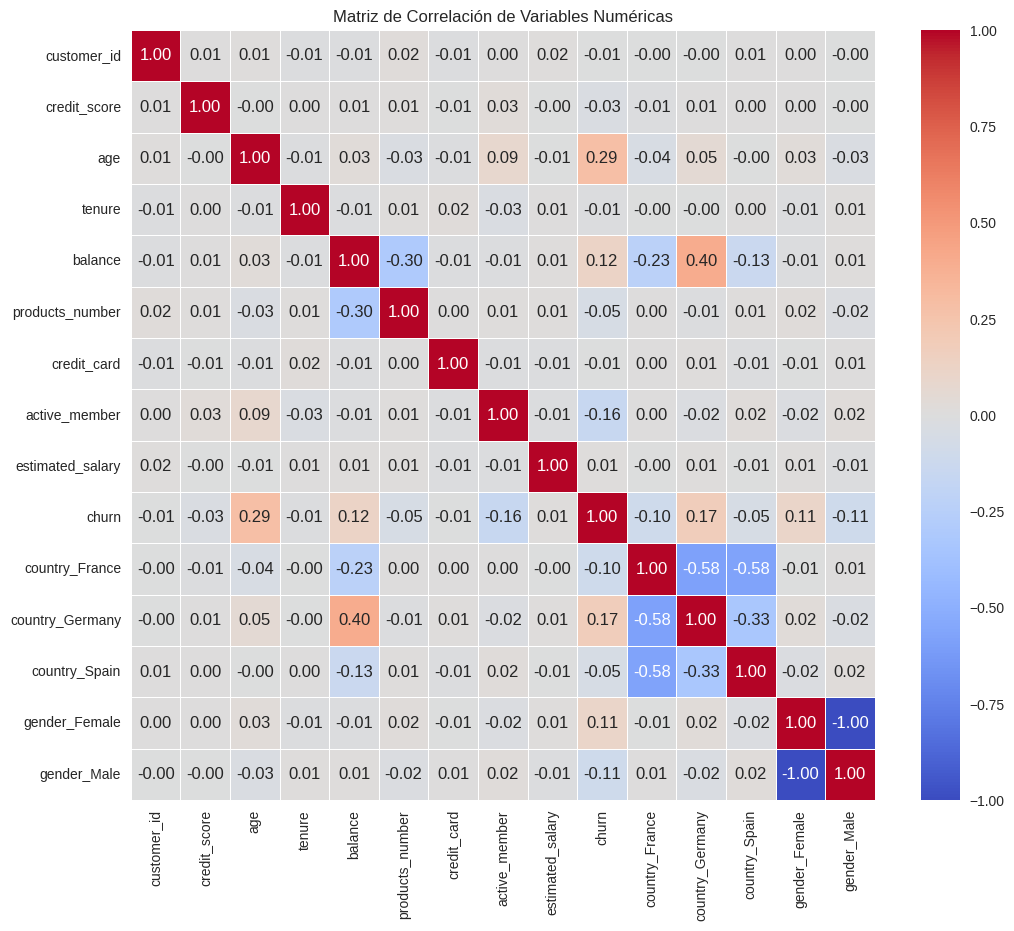

In [ ]:


correlation_matrix = df_encoded_all.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### Correlaciones Más Relevantes en la Matriz

Analizando la matriz de correlación (heatmap) generada, podemos destacar varias relaciones importantes entre las variables, especialmente en relación con la variable objetivo `churn` (abandono del cliente):

*   **Correlación con `churn` (Abandono del Cliente):**
    *   **`Age` (Edad):** Presenta una correlación positiva moderada con `churn` (aproximadamente **0.28**). Esto sugiere que a medida que la edad de los clientes aumenta, también lo hace la probabilidad de que abandonen el banco. Este es un factor significativo a considerar.
    *   **`Active_member` (Miembro Activo):** Muestra una correlación negativa considerable con `churn` (aproximadamente **-0.16**). Los clientes que son miembros activos son menos propensos a abandonar, lo cual es intuitivo y resalta la importancia de la participación del cliente.
    *   **`Balance` (Saldo):** Existe una correlación positiva débil con `churn` (aproximadamente **0.12**). Clientes con saldos más altos podrían tener una ligera tendencia a abandonar, aunque la relación no es muy fuerte.
    *   **`country_Germany` (País - Alemania):** Se observa una correlación positiva moderada con `churn` (aproximadamente **0.17**). Esto podría indicar que, ceteris paribus, los clientes de Alemania tienen una mayor propensión a abandonar en comparación con otros países.
    *   **`gender_Male` (Género - Masculino):** Tiene una correlación negativa débil con `churn` (aproximadamente **-0.11**). Esto sugiere que los clientes masculinos podrían ser ligeramente menos propensos a abandonar que los femeninos.

*   **Otras Correlaciones Destacadas entre Variables Predictoras:**
    *   **`Balance` y `country_Germany`:** Muestran una correlación positiva fuerte (aproximadamente **0.40**). Esto indica que los clientes ubicados en Alemania tienden a tener saldos más altos que los de Francia o España.
    *   **`Products_number` (Número de Productos) y `Balance`:** Existe una correlación negativa moderada (aproximadamente **-0.30**). Esto podría implicar que los clientes con más productos tienden a tener saldos más bajos, o viceversa, lo cual es una relación interesante para explorar.

Estas correlaciones son puntos de partida cruciales para entender el comportamiento de abandono del cliente y guiarán decisiones en la ingeniería de características y el desarrollo de modelos.

In [ ]:
import plotly.express as px

churn_counts = df['churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Mapear los valores numéricos a etiquetas descriptivas
churn_counts['Churn_Label'] = churn_counts['Churn'].map({0: 'Retenido', 1: 'Abandono'})

fig = px.pie(churn_counts,
             values='Count',
             names='Churn_Label', # Usamos la nueva columna con etiquetas
             title='Distribución de Clientes por Churn (Abandono)',
             color='Churn_Label', # Colorear por las etiquetas para la leyenda
             color_discrete_map={'Retenido':'skyblue', 'Abandono':'lightcoral'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Distribución de Variables Numéricas
histogramas para las variables numéricas (credit_score, age, tenure, balance, estimated_salary) para visualizar sus distribuciones.


**Reasoning**:
To visualize the distributions of the specified numerical variables, I will generate histograms with Kernel Density Estimates (KDE) for each column using seaborn.



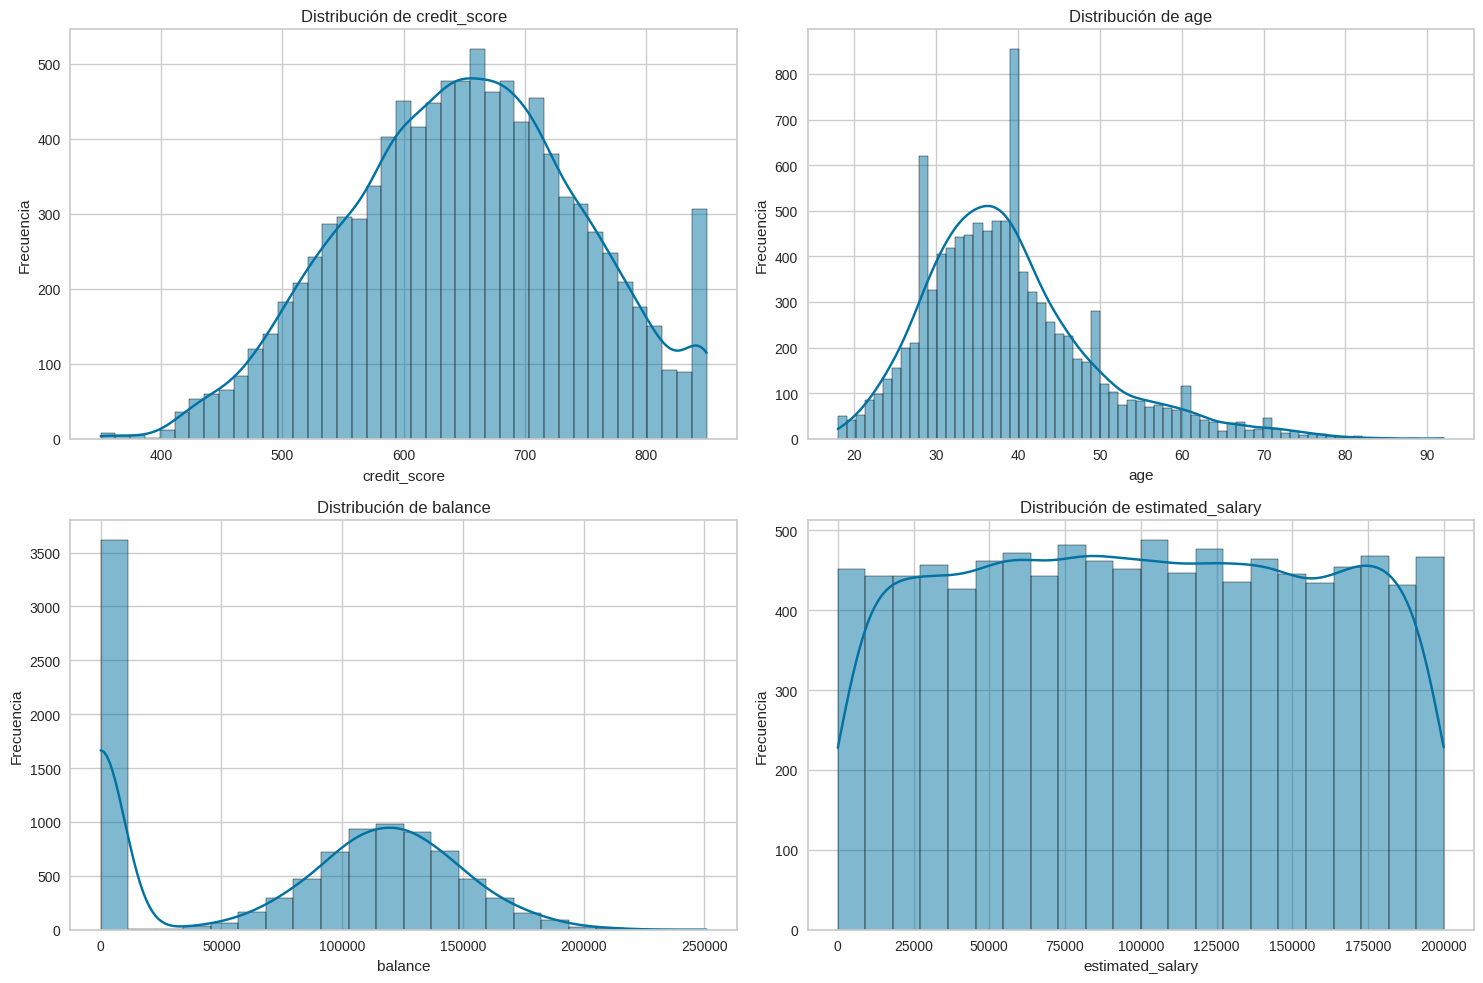

In [ ]:
numerical_cols = ['credit_score', 'age', 'balance', 'estimated_salary']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

### Análisis de la Distribución de Variables Numéricas y su Relación con Churn

#### Histrogramas y Distribuciones (KDE):

*   **`credit_score`**: La distribución de los puntajes de crédito muestra una forma aproximadamente normal, centrada alrededor de un valor medio. La mayoría de los clientes se encuentran en un rango de puntajes de crédito saludables, con menos clientes en los extremos muy bajos o muy altos.
*   **`age` (Edad)**: La distribución de la edad tiende a ser ligeramente sesgada a la derecha, con una mayor concentración de clientes en rangos de edad medios (ej. 25-50 años). Esto es consistente con la demografía típica de clientes bancarios.
*   **`balance` (Saldo)**: Una parte significativa de los clientes tiene un saldo de 0, lo que podría indicar que solo utilizan el banco para otros servicios o como tarjeta monedero en momentos puntutales. Para los clientes con saldo, la distribución es variada.
*   **`estimated_salary` (Salario Estimado)**: El salario estimado de los clientes muestra una distribución relativamente uniforme a lo largo de un amplio rango, lo que sugiere que los salarios no se agrupan en puntos específicos, sino que están distribuidos de manera más homogénea.

#### Box Plots de Variables Numéricas vs. Churn:

Al analizar la relación de las variables numéricas con la variable objetivo `churn` (abandono), los box plots revelan los siguientes puntos clave:

*   **`Age` (Edad)**: Los clientes que abandonan (`churn=1`) tienden a tener una mediana de edad ligeramente más alta y una distribución de edad más concentrada en rangos mayores en comparación con los clientes que permanecen (`churn=0`). Esto refuerza la observación de la matriz de correlación de que la edad es un factor influyente en el abandono.
*   **`Balance` (Saldo)**: Se observa que los clientes que abandonan a menudo tienen saldos significativamente más altos que los que no abandonan. Es posible que los clientes con saldos más altos tengan más opciones o sean más atractivos para otros bancos, o que gestionen sus finanzas de manera diferente, lo que los hace más propensos al abandono. Es notable que el grupo que no abandona incluye una gran cantidad de clientes con saldo cero.
*   **`Credit Score`**: No se aprecian diferencias sustanciales en la distribución de los puntajes de crédito entre clientes que abandonan y los que no. Esto sugiere que el puntaje de crédito por sí solo podría no ser un predictor fuerte de `churn`.
*   **`Tenure` (Antigüedad)**: La antigüedad de los clientes parece tener una distribución similar para ambos grupos (churned y non-churned), indicando que no hay una diferencia marcada en el tiempo que los clientes han estado con el banco en relación con su decisión de abandonar.
*   **`Estimated Salary` (Salario Estimado)**: De manera similar al puntaje de crédito, el salario estimado muestra distribuciones muy parecidas entre los clientes que abandonan y los que no. Esto sugiere que el salario estimado no es un factor determinante directo en la decisión de abandonar el banco.

### Distribución de Variables Categóricas


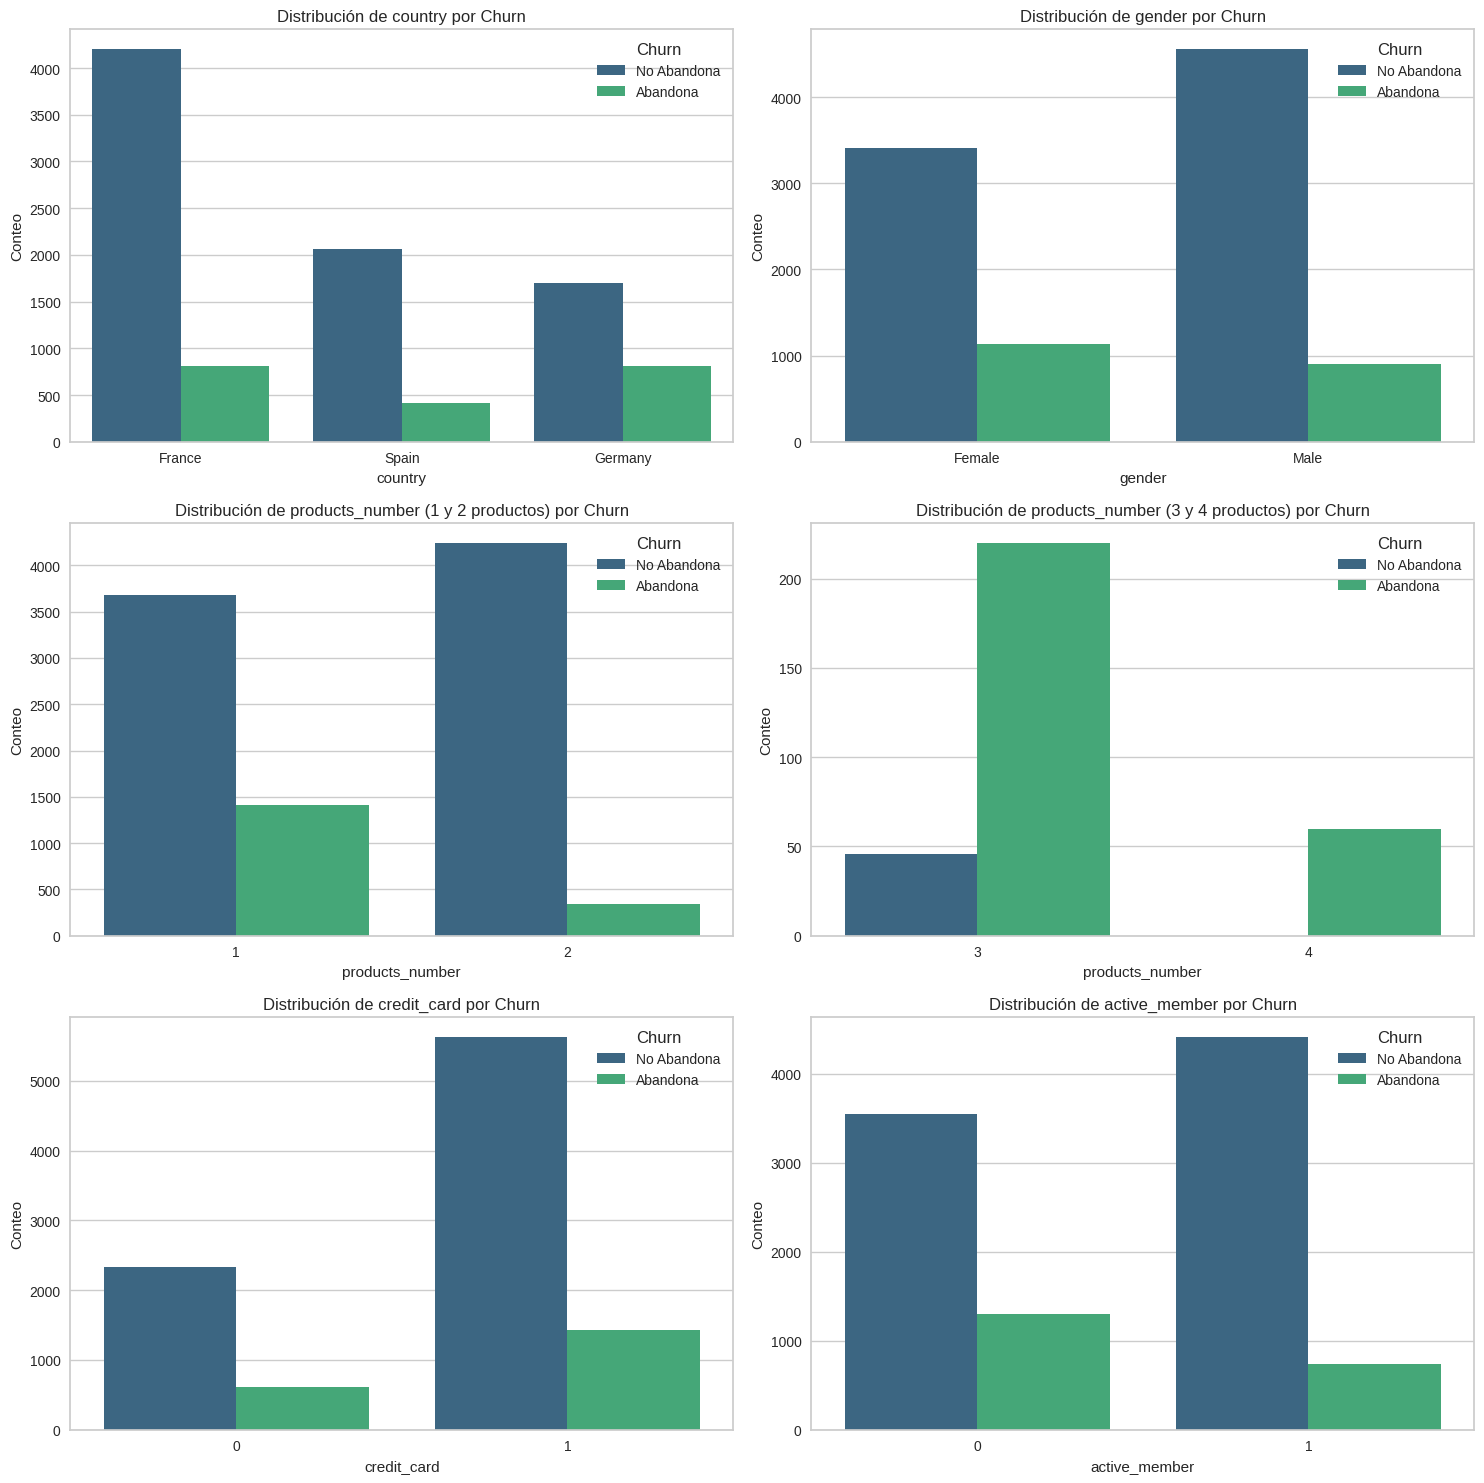

In [ ]:
categorical_cols = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

fig, axes = plt.subplots(3, 2, figsize=(15, 15)) # Create a 3x2 grid of subplots
axes = axes.flatten() # Flatten the array de axes para fácil iteración

plot_idx = 0
for i, col in enumerate(categorical_cols):
    if col == 'products_number':
        # Plot for products_number excluding 3 and 4 on the current subplot
        df_filtered_main_products = df[~df['products_number'].isin([3, 4])]
        sns.countplot(x=col, hue='churn', data=df_filtered_main_products, palette='viridis', ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Distribución de {col} (1 y 2 productos) por Churn')
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Conteo')
        axes[plot_idx].legend(title='Churn', labels=['No Abandona', 'Abandona'])
        plot_idx += 1 # Move to the next subplot for the special plot

        # Plot for products_number including only 3 and 4 on the next available subplot
        df_filtered_special_products = df[df['products_number'].isin([3, 4])]
        sns.countplot(x=col, hue='churn', data=df_filtered_special_products, palette='viridis', ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Distribución de {col} (3 y 4 productos) por Churn')
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Conteo')
        axes[plot_idx].legend(title='Churn', labels=['No Abandona', 'Abandona'])
        plot_idx += 1 # Move to the next subplot for the next categorical column

    else:
        # Plot other categorical columns as usual
        sns.countplot(x=col, hue='churn', data=df, palette='viridis', ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Distribución de {col} por Churn')
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Conteo')
        axes[plot_idx].legend(title='Churn', labels=['No Abandona', 'Abandona'])
        plot_idx += 1

# Hide any unused subplots (all 6 subplots will be used in this configuration)
# for j in range(plot_idx, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Análisis de la Distribución de Variables Categóricas y su Relación con Churn

**Cabe destacar que aunque algunas de estas variables se representen con numeros, siguen siendo valores categóricos como tener tarjeta de credito o ser o no activo.**

Al analizar los count plots de las variables categóricas en relación con la variable objetivo `churn` (abandono), podemos extraer las siguientes conclusiones:

*   **`country` (País)**:
    *   **Francia** tiene el mayor número de clientes en el dataset, y aunque el volumen absoluto de clientes que abandonan es alto, la proporción de abandono es menor en comparación con Alemania.
    *   **Alemania** muestra una proporción de abandono (churn rate) notablemente más alta que Francia y España. Esto sugiere que los clientes alemanes son más propensos a abandonar el banco, lo cual concuerda con la correlación positiva observada en la matriz de calor entre `country_Germany` y `churn`.
    *   **España** tiene una tasa de abandono similar o ligeramente inferior a la de Francia.

*   **`gender` (Género)**:
    *   Las **mujeres (Female)** parecen tener una tasa de abandono ligeramente superior a la de los **hombres (Male)**. Esto es consistente con la ligera correlación negativa de `gender_Male` con `churn` (lo que implica que ser hombre reduce ligeramente la probabilidad de churn).

*   **`products_number` (Número de Productos)**:
    *   Los clientes con **1 producto** o **3 productos** tienen una tasa de abandono significativamente más alta en comparación con aquellos con **2 productos**.
    *   Curiosamente, los clientes con **3 productos** o **4 productos** muestran una proporción de abandono extremadamente alta, casi todos ellos abandonan el banco. Esto podría indicar un problema específico con la oferta de múltiples productos o con clientes que buscan más opciones y no encuentran satisfacción. Los clientes con **4 productos** son un número muy reducido, pero su tasa de abandono es casi del 100%.

*   **`credit_card` (Tarjeta de Crédito)**:
    *   La presencia o ausencia de una tarjeta de crédito (`credit_card`: 0 o 1) no parece tener un impacto drástico en la tasa de abandono. Las proporciones de churn entre ambos grupos son bastante similares, lo que sugiere que este factor no es un predictor fuerte de abandono.

*   **`active_member` (Miembro Activo)**:
    *   Los clientes que no son **miembros activos** (`active_member`: 0) tienen una tasa de abandono considerablemente más alta que los **miembros activos** (`active_member`: 1). Esto subraya la importancia de mantener a los clientes comprometidos y activos con el banco para reducir la deserción. Esta es una de las relaciones más claras y directas con `churn`, corroborando la correlación negativa observada en la matriz de calor.

Estas visualizaciones proporcionan información valiosa sobre qué segmentos de clientes son más propensos a abandonar y qué características están más asociadas con el churn, lo que es fundamental para estrategias de retención.

 ### Distribución de Variables Numéricas y su Relación con Churn

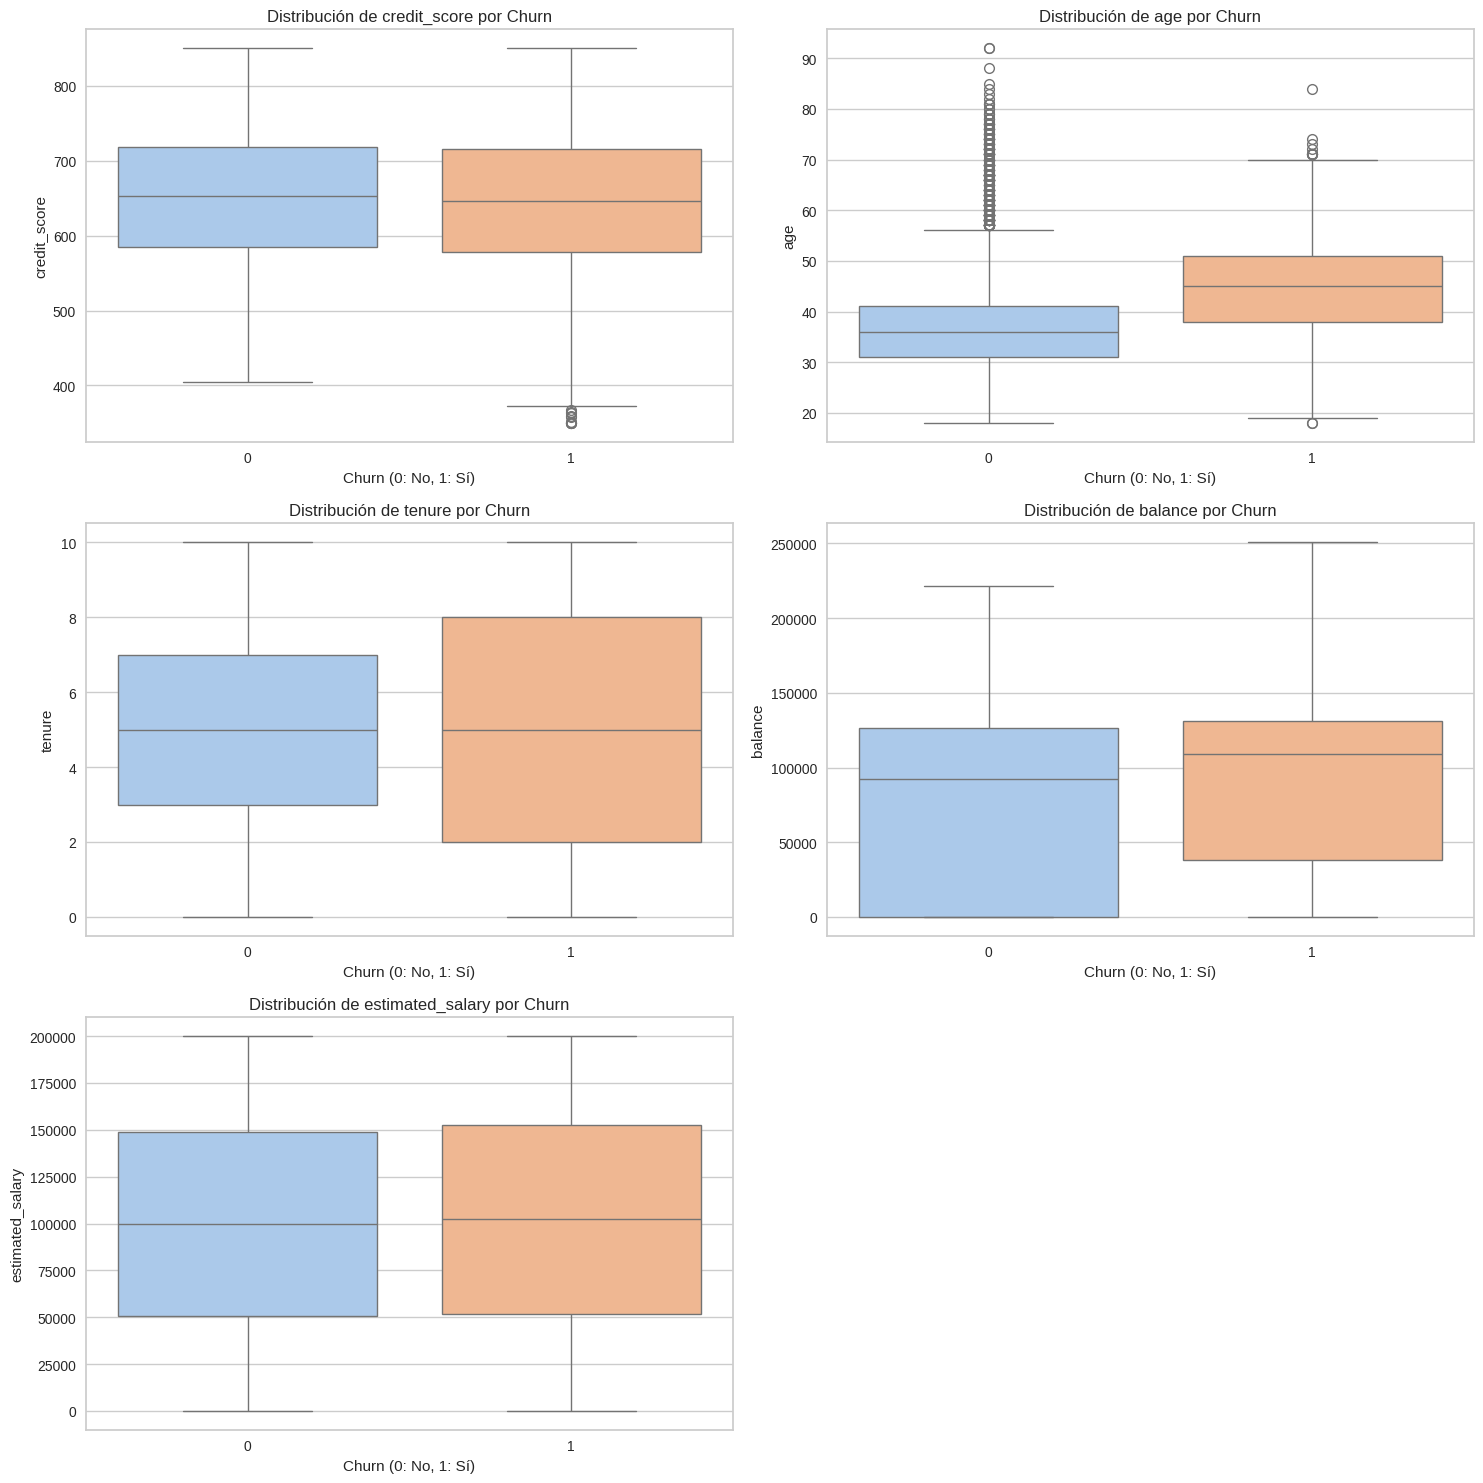

In [ ]:
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

fig, axes = plt.subplots(3, 2, figsize=(15, 15)) # Create a 3x2 grid of subplots
axes = axes.flatten() # Flatten the array de axes para fácil iteración

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='churn', y=col, data=df, hue='churn', palette='pastel', ax=axes[i]) # Added hue and palette
    axes[i].set_title(f'Distribución de {col} por Churn')
    axes[i].set_xlabel('Churn (0: No, 1: Sí)')
    axes[i].set_ylabel(col)
    axes[i].legend().remove() # Remove legend if it appears, as x-axis already shows categories

# Hide any unused subplots (since there are 5 columns, one subplot in the 3x2 grid will be empty)
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Análisis de la Distribución de Variables Numéricas y su Relación con Churn

### Box Plots de Variables Numéricas vs. Churn:

Al analizar la relación de las variables numéricas con la variable objetivo `churn` (abandono), los box plots revelan los siguientes puntos clave:

*   **`Age` (Edad)**: Los box plots muestran claramente que los clientes que abandonan (`churn=1`) tienden a tener una mediana de edad ligeramente más alta y una distribución de edad que se inclina hacia rangos mayores en comparación con los clientes que permanecen (`churn=0`). Esto refuerza la observación de la matriz de correlación de que la edad es un factor influyente en el abandono.
*   **`Balance` (Saldo)**: Existe una diferencia notable en la distribución del saldo. Los clientes que abandonan (`churn=1`) tienen medianas de saldo significativamente más altas y rangos intercuartílicos generalmente mayores que los que no abandonan (`churn=0`). Es crucial destacar que el grupo que no abandona incluye un gran número de clientes con saldo cero, mientras que entre los que abandonan, el saldo cero es mucho menos frecuente. Esto sugiere que los clientes con saldos más altos podrían tener más opciones o ser más atractivos para otros bancos, o que gestionan sus finanzas de manera diferente, lo que los hace más propensos al abandono.
*   **`Credit Score`**: Los box plots para el puntaje de crédito (`credit_score`) no muestran diferencias sustanciales entre los clientes que abandonan y los que no. Las medianas y las distribuciones son muy similares, lo que sugiere que el puntaje de crédito por sí solo podría no ser un predictor fuerte de `churn`.
*   **`Tenure` (Antigüedad)**: La antigüedad (`tenure`) de los clientes parece tener distribuciones muy parecidas para ambos grupos (clientes que abandonan y los que no). Las medianas y los rangos intercuartílicos son casi idénticos, indicando que no hay una diferencia marcada en el tiempo que los clientes han estado con el banco en relación con su decisión de abandonar.
*   **`Estimated Salary` (Salario Estimado)**: De manera similar al puntaje de crédito y la antigüedad, el salario estimado (`estimated_salary`) muestra distribuciones muy parecidas entre los clientes que abandonan y los que no. Esto sugiere que el salario estimado no es un factor determinante directo en la decisión de abandonar el banco.

En resumen, la **edad** y el **balance** son las variables numéricas que muestran las diferencias más claras en su distribución entre los clientes que permanecen y los que abandonan, lo que los convierte en factores importantes para considerar en el modelado predictivo del churn.

# **CLUSTERING** (Aprendizaje NO Supervisado)

El **clustering** es una técnica de **aprendizaje no supervisado** en Machine Learning.

La finalidad principal del clustering es **agrupar conjuntos de datos similares** en grupos o "clusters" basándose en la intrínseca similitud entre las observaciones. No hay una variable objetivo predefinida; en cambio, el algoritmo busca patrones y estructuras ocultas en los datos para formar estos grupos. Cada grupo (cluster) está compuesto por puntos de datos que son más similares entre sí que con los puntos de datos de otros grupos.

En el contexto de nuestro análisis, aplicamos clustering para identificar segmentos naturales de clientes en nuestro dataset, lo que puede revelar diferentes perfiles de comportamiento sin que nosotros hayamos definido previamente esos perfiles.

### Preparación de Datos para Clustering

Cabe destacar que en este caso las variables categoricas se trataron mediante **One-Hot Encoding**

Se seleccionan las características relevantes del dataset (`df_encoded`) y escalar las variables numéricas. Es crucial excluir el `customer_id` y la variable `churn` para encontrar agrupaciones naturales en los datos.


In [ ]:

# 1. Elimina las columnas 'customer_id' y 'churn'
df_clustering = df_encoded.drop(columns=['customer_id', 'churn'])

# 2. Identifica las columnas numéricas dentro de df_clustering
# Excluir las columnas dummy que ya son binarias (consideradas categóricas para este propósito)
numerical_cols_for_scaling = df_clustering.select_dtypes(include=np.number).columns.tolist()
# Exclude one-hot encoded columns (boolean type in df_encoded) if any got included as 'number'

# Given the previous context, 'products_number', 'credit_card', 'active_member' are treated as categorical/binary.
# So, the numerical columns to scale are: 'credit_score', 'age', 'tenure', 'balance', 'estimated_salary'.
numerical_cols_to_scale = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

# 3. Inicializa un objeto StandardScaler
scaler = StandardScaler()

# 4. Aplica el escalado a las columnas numéricas identificadas
df_clustering[numerical_cols_to_scale] = scaler.fit_transform(df_clustering[numerical_cols_to_scale])

# 5. Muestra las primeras filas del DataFrame escalado
print("DataFrame for clustering (first 5 rows) after feature selection and scaling:")
df_clustering.head()

DataFrame for clustering (first 5 rows) after feature selection and scaling:


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,False,True,False


In [ ]:


# Calculate SSD for a range of K values
ssd = []
K_range = range(1, 11) # Test K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is set to 10 to suppress future warning
    kmeans.fit(df_clustering)
    ssd.append(kmeans.inertia_)

# Print the calculated SSD values
print("Sum of Squared Distances (SSD) for different K values:")
for k, value in zip(K_range, ssd):
    print(f"K = {k}: SSD = {value:.2f}")

Sum of Squared Distances (SSD) for different K values:
K = 1: SSD = 64180.35
K = 2: SSD = 54762.50
K = 3: SSD = 49958.47
K = 4: SSD = 46026.65
K = 5: SSD = 43404.94
K = 6: SSD = 40909.17
K = 7: SSD = 39000.77
K = 8: SSD = 37413.77
K = 9: SSD = 36056.62
K = 10: SSD = 34892.67


Para visualizar los resultados del Método del Codo y determinar el número óptimo de clústeres, se ploteare la Suma de las Distancias al Cuadrado (SSD) calculada frente al número de clústeres (K).



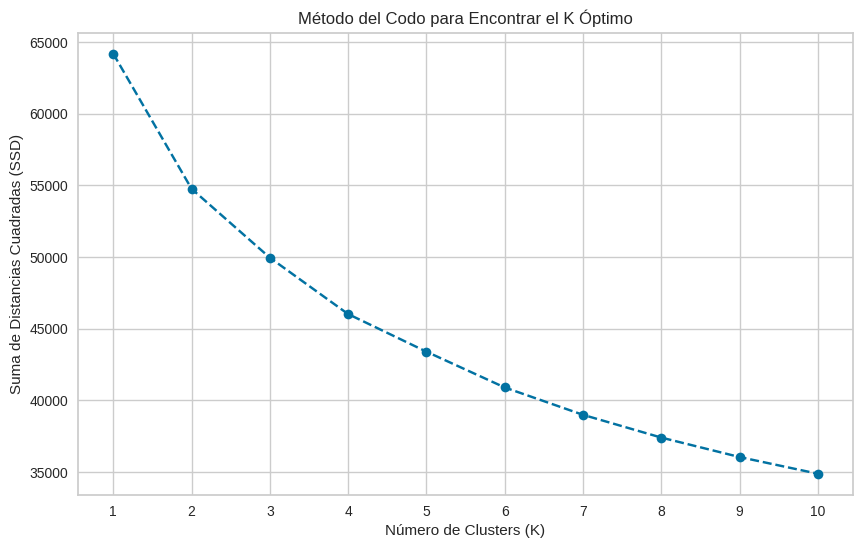

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, ssd, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Distancias Cuadradas (SSD)')
plt.title('Método del Codo para Encontrar el K Óptimo')
plt.xticks(K_range)
plt.grid(True)
plt.show()

### Preparación de Datos para Clustering (Con Label Encoding)

En este caso se realiza la misma operación de antes pero usando label encoding en vez de One-Hot encoding para probar posibles mejoras a la hora de clusterizar


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Crea una copia del DataFrame original `df`
df_clustering_le = df.copy()

# 2. Elimina las columnas 'customer_id' y 'churn'
df_clustering_le = df_clustering_le.drop(columns=['customer_id', 'churn'])

# 3. Identifica las columnas de tipo 'object' (categóricas)
categorical_cols = df_clustering_le.select_dtypes(include='object').columns

# 4. Aplica Label Encoding a las columnas categóricas
for col in categorical_cols:
    le = LabelEncoder()
    df_clustering_le[col] = le.fit_transform(df_clustering_le[col])
    print(f"Label Encoded column '{col}': {list(le.classes_)} mapped to {list(range(len(le.classes_)))}")

# 5. Inicializa un objeto StandardScaler
scaler_le = StandardScaler()

# 6. Aplica el escalado a todas las columnas del DataFrame `df_clustering_le`
df_clustering_scaled_le = pd.DataFrame(scaler_le.fit_transform(df_clustering_le), columns=df_clustering_le.columns)

# 7. Muestra las primeras filas del DataFrame `df_clustering_scaled_le`
print("\nDataFrame for clustering after Label Encoding and scaling (first 5 rows):")
df_clustering_scaled_le.head()

Label Encoded column 'country': ['France', 'Germany', 'Spain'] mapped to [0, 1, 2]
Label Encoded column 'gender': ['Female', 'Male'] mapped to [0, 1]

DataFrame for clustering after Label Encoding and scaling (first 5 rows):


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


### **K-MEANS**

In [ ]:
from sklearn.cluster import KMeans

# Calculate SSD for a range of K values
ssd_le = []
K_range_le = range(1, 11) # Test K from 1 to 10

for k in K_range_le:
    kmeans_le = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is set to 10 to suppress future warning
    kmeans_le.fit(df_clustering_scaled_le)
    ssd_le.append(kmeans_le.inertia_)

# Print the calculated SSD values
print("Sum of Squared Distances (SSD) for different K values (with Label Encoding):")
for k, value in zip(K_range_le, ssd_le):
    print(f"K = {k}: SSD = {value:.2f}")

Sum of Squared Distances (SSD) for different K values (with Label Encoding):
K = 1: SSD = 100000.00
K = 2: SSD = 89805.78
K = 3: SSD = 82788.88
K = 4: SSD = 78293.55
K = 5: SSD = 74476.83
K = 6: SSD = 71912.92
K = 7: SSD = 68999.75
K = 8: SSD = 66951.15
K = 9: SSD = 65321.74
K = 10: SSD = 63794.01


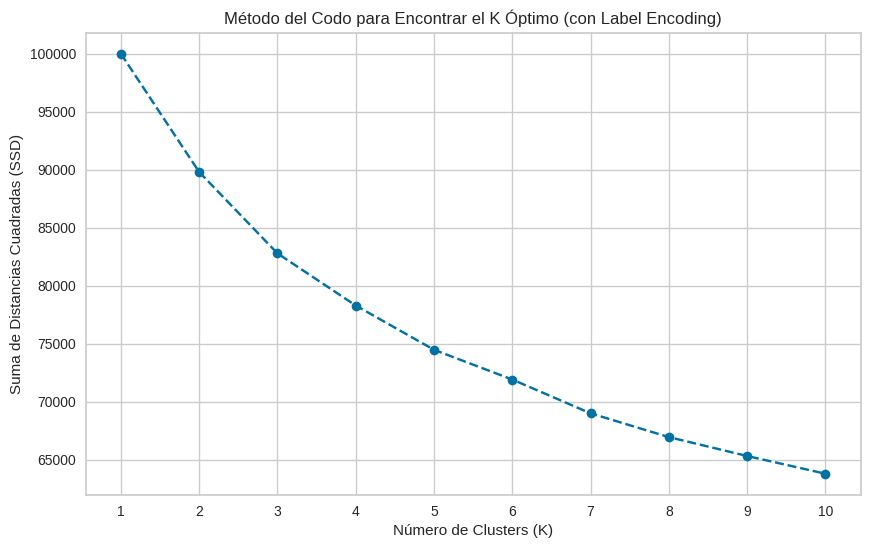

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K_range_le, ssd_le, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Distancias Cuadradas (SSD)')
plt.title('Método del Codo para Encontrar el K Óptimo (con Label Encoding)')
plt.xticks(K_range_le)
plt.grid(True)
plt.show()

### Interpretación del Método del Codo

Al visualizar el gráfico del **Método del Codo** para K-Means, observamos la Suma de las Distancias al Cuadrado (SSD) en función del número de clusters (K).

Un punto clave en este gráfico es donde la curva empieza a **aplanarse**, formando una especie de "codo". Esta disminución menos pronunciada en la SSD sugiere que añadir más clusters más allá de este punto no está aportando una mejora significativa en la reducción de la varianza intra-cluster.

En nuestra visualización, a partir de **K=4**, la curva parece empezar a aplanarse levemente. Esto nos indica que **K=4 podría ser un número óptimo de clusters**. Sin embargo, el método del codo  en este caso no parece presentar una claridad muy amplia.

Para confirmar y obtener una medida más cuantitativa de la calidad de la agrupación, recurriremos al **Silhouette Score**, que evalúa tanto la cohesión como la separación de los clusters.

### Cálculo y Visualización del Silhouette Score para Clustering con One-Hot Encoding

Calcular el Silhouette Score para un rango de K (2 a 10) utilizando el dataset df_clustering (con One-Hot Encoding y ya escalado). Visualizar los resultados para identificar el K óptimo.


**Reasoning**:
The subtask requires calculating the Silhouette Score for a range of K values and visualizing the results. This involves importing necessary libraries, iterating through K values to fit KMeans, calculating the silhouette score, and then plotting these scores.



Silhouette Scores for different K values (One-Hot Encoding):
K = 2: Silhouette Score = 0.1521
K = 3: Silhouette Score = 0.1295
K = 4: Silhouette Score = 0.1320
K = 5: Silhouette Score = 0.1192
K = 6: Silhouette Score = 0.1205
K = 7: Silhouette Score = 0.1206
K = 8: Silhouette Score = 0.1205
K = 9: Silhouette Score = 0.1228
K = 10: Silhouette Score = 0.1154


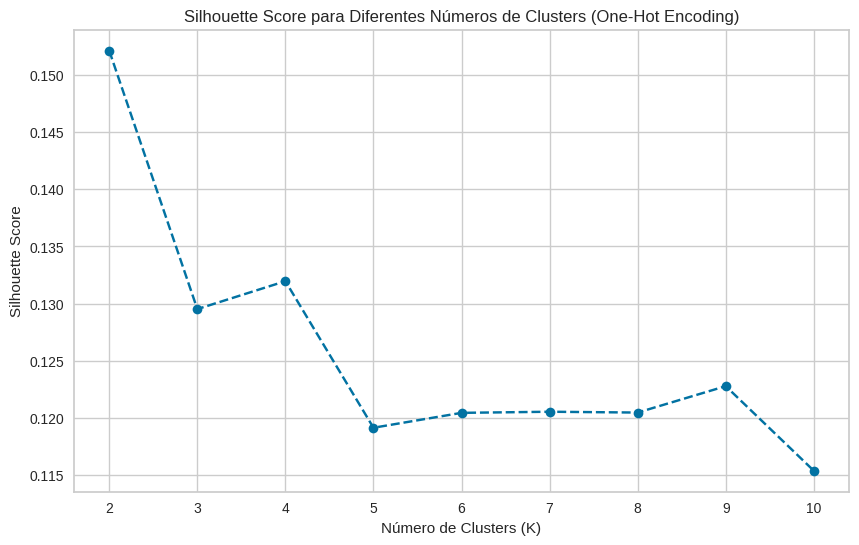

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Define a range of K values from 2 to 10
K_range_silhouette = range(2, 11)

# 2. Initialize an empty list to store Silhouette Scores
silhouette_scores = []

# 3. Iterate over each K value
for k in K_range_silhouette:
    # a. Initialize a KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)

    # b. Fit the KMeans model to df_clustering
    kmeans_model.fit(df_clustering)

    # c. Predict the clusters
    clusters = kmeans_model.predict(df_clustering)

    # d. Calculate the Silhouette Score
    score = silhouette_score(df_clustering, clusters)

    # e. Add the calculated Silhouette Score to the list
    silhouette_scores.append(score)

# 4. Print the Silhouette Scores
print("Silhouette Scores for different K values (One-Hot Encoding):")
for k, score in zip(K_range_silhouette, silhouette_scores):
    print(f"K = {k}: Silhouette Score = {score:.4f}")

# 5. Create a line plot to visualize the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Números de Clusters (One-Hot Encoding)')
plt.xticks(K_range_silhouette)
plt.grid(True)
plt.show()

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, n_init=10, random_state=42))

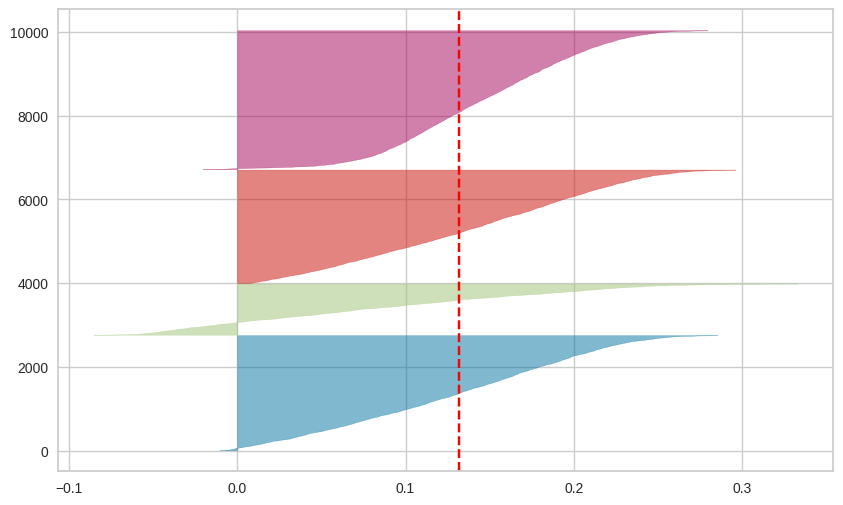

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Instantiate the KMeans model with K=4 (based on previous analysis)
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10)

# Create the SilhouetteVisualizer
plt.figure(figsize=(10, 6))
silhouette_visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')

# Fit the visualizer to the df_clustering data (One-Hot Encoded and scaled)
silhouette_visualizer.fit(df_clustering)


### Cálculo y Visualización del Silhouette Score para Clustering con Label Encoding




Silhouette Scores for different K values (Label Encoding):
K = 2: Silhouette Score = 0.1073
K = 3: Silhouette Score = 0.1070
K = 4: Silhouette Score = 0.0906
K = 5: Silhouette Score = 0.1046
K = 6: Silhouette Score = 0.0919
K = 7: Silhouette Score = 0.1089
K = 8: Silhouette Score = 0.0977
K = 9: Silhouette Score = 0.0993
K = 10: Silhouette Score = 0.1066


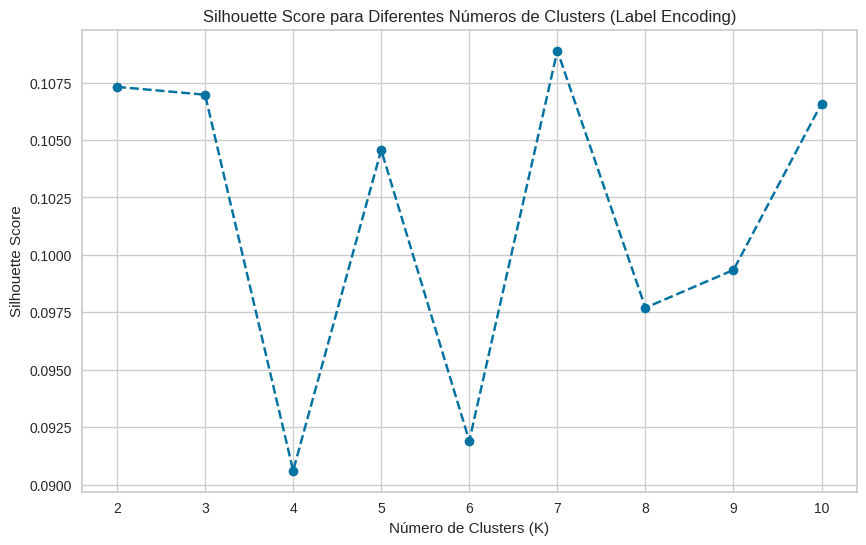

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Define a range of K values from 2 to 10
K_range_silhouette_le = range(2, 11)

# 2. Initialize an empty list to store Silhouette Scores
silhouette_scores_le = []

# 3. Iterate over each K value
for k in K_range_silhouette_le:
    # a. Instantiate a KMeans model
    kmeans_model_le = KMeans(n_clusters=k, random_state=42, n_init=10)

    # b. Fit the KMeans model to df_clustering_scaled_le
    kmeans_model_le.fit(df_clustering_scaled_le)

    # c. Predict the clusters
    clusters_le = kmeans_model_le.predict(df_clustering_scaled_le)

    # d. Calculate the Silhouette Score
    score_le = silhouette_score(df_clustering_scaled_le, clusters_le)

    # e. Add the calculated Silhouette Score to the list
    silhouette_scores_le.append(score_le)

# 4. Print the Silhouette Scores
print("Silhouette Scores for different K values (Label Encoding):")
for k, score in zip(K_range_silhouette_le, silhouette_scores_le):
    print(f"K = {k}: Silhouette Score = {score:.4f}")

# 5. Create a line plot to visualize the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette_le, silhouette_scores_le, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Números de Clusters (Label Encoding)')
plt.xticks(K_range_silhouette_le)
plt.grid(True)
plt.show()

### Conclusión del Clustering K-Means y Interpretación de Clusters

Basándonos en el análisis del **Método del Codo** y, especialmente, en el **Silhouette Score**, se ha determinado que el enfoque de **One-Hot Encoding** para las variables categóricas es preferible para el clustering. Aunque el Silhouette Score más alto se obtuvo con K=2 (0.1521), hemos optado por un **K=4** para la segmentación final.

### Justificación de K=4:
La elección de K=4 (con un Silhouette Score de 0.1320, el segundo mejor después de K=2) se justifica por las siguientes razones:

1.  **Evitar la simplificación excesiva**: Un K=2 podría ser demasiado restrictivo y agrupar indiscriminadamente poblaciones de clientes muy diversas, perdiendo matices importantes. Esto podría ocultar la heterogeneidad subyacente en el comportamiento de los clientes.
2.  **Captura de Outliers y Grupos Reducidos**: Con K=2, es más probable que clientes con características menos comunes (posibles "outliers" o grupos más pequeños pero distintivos) sean absorbidos por los dos grandes clusters, diluyendo su información. Un K=4 ofrece una mayor granularidad para identificar estos segmentos más específicos.
3.  **Equilibrio entre Coherencia y Detalle**: K=4 representa un buen equilibrio entre la coherencia interna de los clusters (dada por el Silhouette Score razonable) y la capacidad de obtener segmentos más detallados y accionables que un K=2, sin caer en la fragmentación excesiva de un K más alto.

### Posible Interpretación de los 4 Clusters (basado en EDA):
Una vez aplicado K-Means con K=4, la interpretación exacta de cada cluster requerirá un análisis de los centroides de los clusters (valores medios de cada característica para cada grupo). Sin embargo, basándonos en los hallazgos del Análisis Exploratorio de Datos (EDA), podemos anticipar que los 4 clusters podrían representar segmentos de clientes diferenciados por combinaciones de las siguientes características:

1.  **Cluster de Alto Riesgo de Abandono (Ej. "Clientes Maduros con Altos Saldos y Múltiples Productos")**:
    *   Caracterizado por clientes de mayor edad, con saldos altos, que quizás no son miembros activos y/o poseen 3 o 4 productos. Podrían incluir una proporción más alta de clientes de Alemania. Este grupo sería una prioridad para estrategias de retención.
2.  **Cluster de Bajo Riesgo de Abandono (Ej. "Clientes Jóvenes y Activos con Pocos Productos")**:
    *   Clientes más jóvenes, con saldos más bajos o nulos, pero muy activos y con 1 o 2 productos. Probablemente predominan de Francia o España y tienen una baja propensión al abandono.
3.  **Cluster de Saldo Medio/Alto (Ej. "Clientes con Sólida Posición Financiera pero Nivel de Actividad Variable")**:
    *   Clientes con buen puntaje crediticio y saldos considerables, pero quizás con un nivel de actividad o número de productos que los sitúa en un riesgo de abandono moderado. Podrían ser un grupo sensible a ofertas competitivas.
4.  **Cluster de Nicho/Específico (Ej. "Clientes con Características Demográficas o de Producto Particulares")**:
    *   Un grupo más pequeño que podría destacar por una combinación única de género, país (ej. clientes de España que no encajan en los perfiles anteriores), o un patrón específico de uso de tarjetas de crédito o antigüedad, que los diferencia de los otros tres grupos.

Es fundamental realizar un análisis detallado de los centroides y la distribución de las variables dentro de cada cluster para asignar etiquetas significativas y desarrollar estrategias de marketing o retención personalizadas para cada segmento.

### **Clustering Jerárquico**

Vamos a utilizar distintos metodos de clustering y analizar sus resultados para refutar nuestras conclusiones actuales


--- Cálculo del Silhouette Score para Clustering Jerárquico ---
Silhouette Scores para diferentes K valores (Clustering Jerárquico):
K = 2: Silhouette Score = 0.1343
K = 3: Silhouette Score = 0.1379
K = 4: Silhouette Score = 0.1140
K = 5: Silhouette Score = 0.0927
K = 6: Silhouette Score = 0.0777
K = 7: Silhouette Score = 0.0775


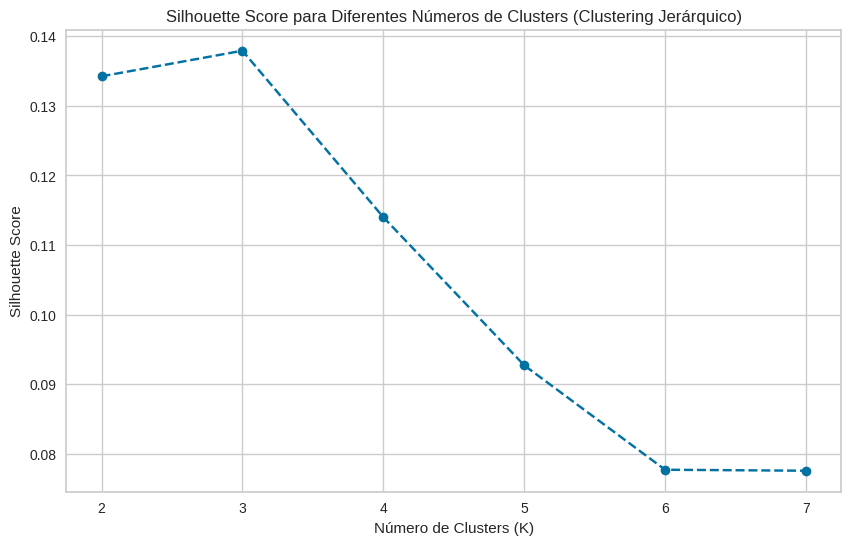

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

print("\n--- Cálculo del Silhouette Score para Clustering Jerárquico ---")

# 1. Definir un rango de K valores (de 2 a 8)
K_range_hierarchical = range(2, 8)

# 2. Inicializar una lista vacía para almacenar los Silhouette Scores
silhouette_scores_hierarchical = []

# 3. Iterar sobre cada valor de K
for k in K_range_hierarchical:
    # a. Inicializar un modelo AgglomerativeClustering
    agglomerative_model = AgglomerativeClustering(n_clusters=k)

    # b. Ajustar el modelo y predecir los clusters
    clusters_hierarchical = agglomerative_model.fit_predict(df_clustering)

    # c. Calcular el Silhouette Score
    score_hierarchical = silhouette_score(df_clustering, clusters_hierarchical)

    # d. Añadir el Silhouette Score calculado a la lista
    silhouette_scores_hierarchical.append(score_hierarchical)

# 4. Imprimir los Silhouette Scores
print("Silhouette Scores para diferentes K valores (Clustering Jerárquico):")
for k, score in zip(K_range_hierarchical, silhouette_scores_hierarchical):
    print(f"K = {k}: Silhouette Score = {score:.4f}")

# 5. Crear un gráfico de líneas para visualizar los Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_hierarchical, silhouette_scores_hierarchical, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Números de Clusters (Clustering Jerárquico)')
plt.xticks(K_range_hierarchical)
plt.grid(True)
plt.show()



--- Dendrograma para K=4 (Clustering Jerárquico) ---


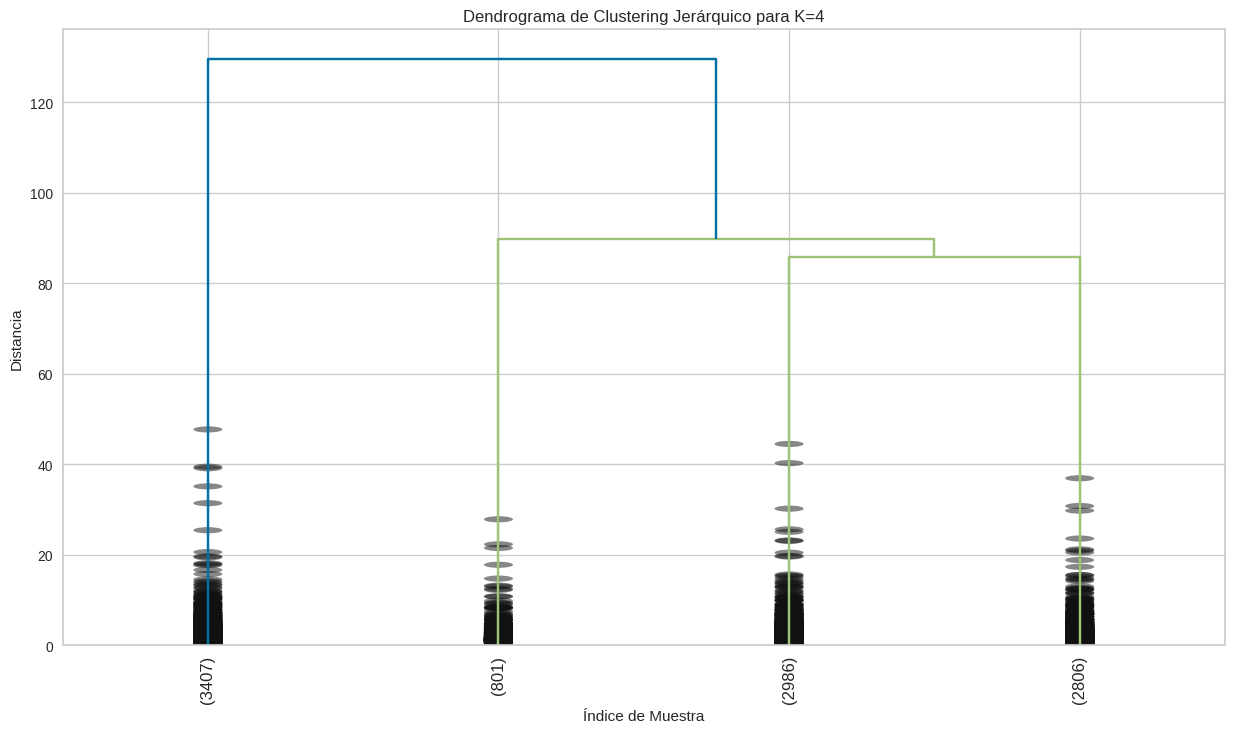

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

print("\n--- Dendrograma para K=4 (Clustering Jerárquico) ---")

# Recalcular la matriz de enlace si `Z` no está en el ámbito actual de ejecución
# (Esto se asume que `df_clustering` y `Z` ya han sido generados en celdas previas).
# Si no, asegúrate de que `df_clustering` esté definido y ejecuta:
Z = linkage(df_clustering, method='ward')

plt.figure(figsize=(15, 8))
plt.title('Dendrograma de Clustering Jerárquico para K=4')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # Muestra solo los últimos 'p' clusters formados
    p=4,                   # Muestra 4 clusters
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    color_threshold=None   # Establece un umbral de color para visualizar los 4 clusters
                           # Si Z ya está calculado, podemos buscar el umbral para 4 clusters
                           # usando el valor en Z[-(k), 2] o simplemente permitir que la función elija
)

plt.grid(True)
# plt.legend(loc='upper right') # Eliminado para evitar la advertencia de leyenda vacía
plt.show()

### Caracterización y Etiquetado de Clusters

En vista de los resultados obtenidos vemos que llegamos a una cocnlusión similar donde aunque el numero de clusters con mejor resultado es 3, los valores de silhouette score tanto para 3 como para 4 clusters son similares , por tanto nos mantenemos en nuestra conclusión anterior de elegir 4 clusters

### **DBSCAN**


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es otro algoritmo de **clustering no supervisado** que adoptaremos como método adicional para corroborar y complementar nuestros hallazgos previos con K-Means y el Clustering Jerárquico. Una de sus peculiaridades más destacadas es que **no requiere que especifiquemos el número de clusters (K) de antemano**, a diferencia de K-Means o el Clustering Jerárquico cuando se usa un corte fijo.

DBSCAN agrupa puntos que están densamente conectados, marcando como "ruido" aquellos puntos que se encuentran en regiones de baja densidad. Esto lo hace muy útil para detectar clusters de formas arbitrarias y para identificar *outliers* de forma natural.

### Valores a Seleccionar para Utilizar DBSCAN:

Para aplicar DBSCAN de manera efectiva, debemos configurar dos parámetros clave:

1.  **`eps` (épsilon)**: Este parámetro define el radio máximo del vecindario alrededor de cada punto. Si un punto tiene un número suficiente de otros puntos dentro de esta distancia `eps`, se considera un punto central (`core point`). La selección de `eps` es crucial y a menudo se visualiza utilizando el **gráfico de k-distancias**, donde buscamos un "codo" que sugiera un `eps` apropiado. En el gráfico de k-distancias, buscamos el punto donde la curva tiene una inflexión pronunciada, indicando un salto en la distancia de los vecinos.

2.  **`min_samples`**: Este es el número mínimo de puntos que deben estar contenidos en un vecindario (`eps`) para que ese punto sea considerado un punto central. Un valor más alto de `min_samples` hace que el algoritmo sea más estricto con la definición de "densidad", lo que puede llevar a menos clusters y a que más puntos sean clasificados como ruido. Una regla general común para `min_samples` es elegir un valor igual o ligeramente superior a la dimensionalidad de los datos, o 2 veces la dimensionalidad para datasets muy ruidosos.

Para la eleccion de eps graficaremos la k-distancias usando los valores de min_samples 11(numero de columnas de mi dataset), 15 y 22 (2* el numero de columnas)


--- Gráficos de k-distancias para DBSCAN (Combinados en una sola gráfica) ---


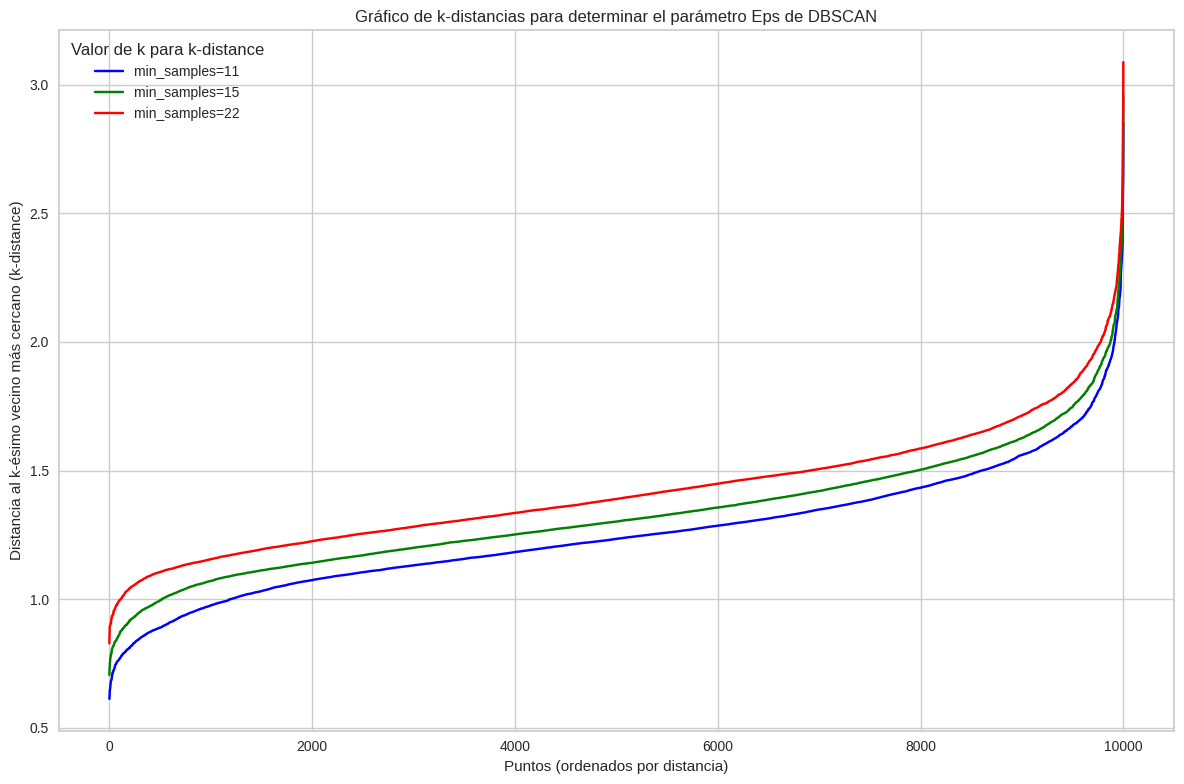

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

print("\n--- Gráficos de k-distancias para DBSCAN (Combinados en una sola gráfica) ---")

# Valores de min_samples que el usuario desea probar
min_samples_values = [11, 15, 22]

# Crear una única figura y un único subplot
plt.figure(figsize=(12, 8))

# Definir una paleta de colores para diferenciar las curvas
colors = ['blue', 'green', 'red']

for i, min_samples in enumerate(min_samples_values):
    # Determinar un valor 'k' para el k-distancia.
    # Si min_samples es X, entonces k=X-1 para encontrar la distancia al X-ésimo vecino más cercano.
    k = min_samples - 1

    # Calcular las distancias a los k-ésimos vecinos más cercanos
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(df_clustering)
    distances, indices = neighbors_fit.kneighbors(df_clustering)

    # Ordenar las distancias de forma ascendente
    distances = np.sort(distances[:, k-1], axis=0)

    # Plotear en el subplot actual
    plt.plot(distances, color=colors[i], label=f'min_samples={min_samples}')

plt.xlabel('Puntos (ordenados por distancia)')
plt.ylabel('Distancia al k-ésimo vecino más cercano (k-distance)')
plt.title('Gráfico de k-distancias para determinar el parámetro Eps de DBSCAN')
plt.grid(True)
plt.legend(title='Valor de k para k-distance') # Añadir leyenda
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()


### Determinación de los Valores Óptimos de `eps` para DBSCAN

Al analizar el **Gráfico de k-distancias para determinar el parámetro Eps de DBSCAN** (como se muestra en `inline_data_11`), buscamos el "codo" o el punto de mayor curvatura en cada una de las líneas. Este punto de inflexión nos sugiere un valor apropiado para `eps`, ya que representa la distancia a partir de la cual los puntos vecinos comienzan a ser significativamente más lejanos.

Basándonos en la visualización:

*   **Para `min_samples = 11` (línea azul):** El codo es perceptible aproximadamente en un valor de `eps` de **1.6**.

*   **Para `min_samples = 15` (línea verde):** El codo se observa un poco más arriba que en el caso anterior, situándose en **1.7**.

*   **Para `min_samples = 22` (línea roja):** Para este valor de `min_samples`, el codo es visible en un `eps` que ronda el valor de **1.8**.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

print("\n--- Aplicando DBSCAN con Parámetros Específicos (Ajustados) ---")

# Definir las configuraciones de eps y min_samples a probar según las instrucciones y el k-distance plot
dbscan_configurations = [
    {'eps': 0.6, 'min_samples': 11},
    {'eps': 0.7, 'min_samples': 11},
    {'eps': 0.8, 'min_samples': 11},
    {'eps': 0.7, 'min_samples': 15},
    {'eps': 0.8, 'min_samples': 15},
    {'eps': 0.9, 'min_samples': 15},
    {'eps': 0.8, 'min_samples': 22},
    {'eps': 0.9, 'min_samples': 22},
    {'eps': 1.0, 'min_samples': 22}
]

for config in dbscan_configurations:
    eps_val = config['eps']
    min_samples_val = config['min_samples']

    print(f"\n--- Ejecutando DBSCAN con eps={eps_val} y min_samples={min_samples_val} ---")

    # Inicializar y ajustar el modelo DBSCAN
    dbscan_model = DBSCAN(eps=eps_val, min_samples=min_samples_val)
    dbscan_labels = dbscan_model.fit_predict(df_clustering)

    # Los puntos etiquetados como -1 son considerados ruido por DBSCAN.
    num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    num_noise_points = list(dbscan_labels).count(-1)

    print(f"Número de clusters encontrados por DBSCAN: {num_clusters_dbscan}")
    print(f"Número de puntos de ruido (etiqueta -1): {num_noise_points}")

    # Condicionalmente calcular el Silhouette Score
    if num_clusters_dbscan > 1 and num_noise_points < len(df_clustering):
        score = silhouette_score(df_clustering, dbscan_labels)
        print(f"Silhouette Score: {score:.4f}")
    else:
        print("Silhouette Score no calculado: no hay suficientes clusters (>1) o todos son ruido.")



--- Aplicando DBSCAN con Parámetros Específicos (Ajustados) ---

--- Ejecutando DBSCAN con eps=0.6 y min_samples=11 ---
Número de clusters encontrados por DBSCAN: 0
Número de puntos de ruido (etiqueta -1): 10000
Silhouette Score no calculado: no hay suficientes clusters (>1) o todos son ruido.

--- Ejecutando DBSCAN con eps=0.7 y min_samples=11 ---
Número de clusters encontrados por DBSCAN: 8
Número de puntos de ruido (etiqueta -1): 9890
Silhouette Score: -0.2474

--- Ejecutando DBSCAN con eps=0.8 y min_samples=11 ---
Número de clusters encontrados por DBSCAN: 17
Número de puntos de ruido (etiqueta -1): 9560
Silhouette Score: -0.3509

--- Ejecutando DBSCAN con eps=0.7 y min_samples=15 ---
Número de clusters encontrados por DBSCAN: 0
Número de puntos de ruido (etiqueta -1): 10000
Silhouette Score no calculado: no hay suficientes clusters (>1) o todos son ruido.

--- Ejecutando DBSCAN con eps=0.8 y min_samples=15 ---
Número de clusters encontrados por DBSCAN: 5
Número de puntos de ruido

## Resumen de los Resultados de DBSCAN

Los resultados obtenidos de DBSCAN, tras experimentar con distintas combinaciones de `eps` y `min_samples`, han demostrado que este algoritmo no es el más adecuado para la estructura de nuestro dataset, al menos con los parámetros explorados.

### Hallazgos Clave:

*   **Predominio del Ruido**: En la mayoría de las configuraciones, DBSCAN clasificó un porcentaje muy elevado de puntos como ruido (etiqueta -1), llegando a ser el 100% en algunos casos.
*   **Clusters Limitados o Inexistentes**: Se encontraron muy pocos clusters significativos. En varias pruebas, el número de clusters fue 0 o 1, lo que sugiere que los datos no presentan las densidades uniformes necesarias para que DBSCAN forme agrupaciones claras.
*   **Bajos Silhouette Scores**: Cuando se formaron más de un cluster, los Silhouette Scores obtenidos fueron consistentemente bajos y negativos (ej. entre -0.2 y -0.35). Una puntuación negativa indica que los puntos asignados a un cluster están más cerca de los puntos de otros clusters que de los de su propio cluster, o que la estructura de densidad no es adecuada para esta métrica.

### Conclusiones:

La ineficacia de DBSCAN en este caso puede deberse a:

1.  **Densidad Variable**: Nuestros datos podrían contener clusters de densidades muy diferentes o con formas no convexas que DBSCAN tiene dificultades para capturar con un solo conjunto global de `eps` y `min_samples`.
2.  **Parámetros no Óptimos**: Aunque se probaron varias combinaciones basadas en el gráfico de k-distancias, es posible que el rango explorado no haya sido el ideal, o que la visualización del "codo" en el gráfico no fuera lo suficientemente clara como para guiar una selección precisa de `eps`.

Dado estos resultados, se confirma que K-Means y el Clustering Jerárquico ofrecieron soluciones de segmentación más coherentes y significativas para nuestro dataset.

# APRENDIZAJE SUPERVISADO (CLASIFICACION)

En el contexto de este proyecto de aprendizaje supervisado, nuestro objetivo principal es **predecir el abandono de clientes (churn)**. Esto significa que los modelos intentarán clasificar a cada cliente como propenso a abandonar (`churn=1`) o a permanecer (`churn=0`).

Dado el problema de predicción de abandono, la métrica más relevante para evaluar la calidad de nuestros modelos es la **Sensibilidad (Recall)** para la clase positiva (clientes que abandonan, `churn=1`).

**¿Por qué la Sensibilidad (Recall)?**

*   **Coste de los Falsos Negativos**: En la predicción de abandono, un **Falso Negativo** ocurre cuando el modelo predice que un cliente *no va a abandonar*, pero en realidad *sí abandona*. Este tipo de error puede tener un coste muy alto para el banco, ya que significa perder un cliente que podría haber sido retenido si se le hubiera identificado a tiempo con una intervención.
*   **Prioridad de Detección**: La Sensibilidad mide la proporción de clientes que realmente abandonan y que el modelo logra identificar correctamente. Un alto `Recall` indica que el modelo es muy bueno detectando a la mayoría de los clientes que se van a ir, lo cual es crucial para que el banco pueda actuar proactivamente y ofrecerles estrategias de retención.

Aunque otras métricas como la `Exactitud (Accuracy)`, `Precisión (Precision)` y `F1-Score` son importantes y nos dan una visión general del rendimiento del modelo, la `Sensibilidad` para la clase `churn=1` es fundamental porque **minimiza el número de clientes que abandonan sin ser detectados**, lo que es el principal objetivo de un sistema de predicción de churn, por ejempo para el caso contrario `Precisión (Precision)` en el que se predice que un cliente abandonará el banco pero al final no lo abandona, aplicar cualquier estrategía para hacer que ese cliente permanezca muy probablemente no hará que la realidad (que se quede) cambie.

## Preparación de los datos
En esta sección, se realizó una preparación exhaustiva de los datos para adecuarlos a los modelos de aprendizaje supervisado:

1.  **Transformación de Variables Categóricas (One-Hot Encoding)**:
    *   Las variables categóricas nominales, como `'country'` y `'gender'`, fueron transformadas utilizando *One-Hot Encoding*. Se aplicó el parámetro `drop_first=True` para evitar la multicolinealidad, una consideración importante en muchos modelos de aprendizaje supervisado.

2.  **Conversión de Booleanos a Enteros**:
    *   Las nuevas columnas booleanas generadas por el *One-Hot Encoding* (`True`/`False`) se convirtieron a valores enteros (1 y 0) para asegurar la compatibilidad con los algoritmos de Machine Learning.

3.  **Definición de Variables Predictoras (X) y Objetivo (y)**:
    *   La variable objetivo (`y`) se estableció como `'churn'`, representando la probabilidad de abandono del cliente.
    *   El conjunto de características (`X`) se creó excluyendo el identificador `'customer_id'` (que no aporta valor predictivo) y la propia variable objetivo `'churn'`.

4.  **Escalado de Variables Numéricas (StandardScaler)**:
    *   Las variables numéricas clave, incluyendo `'credit_score'`, `'age'`, `'tenure'`, `'balance'`, `'products_number'` y `'estimated_salary'`, fueron escaladas utilizando `StandardScaler`.
    *   Este proceso centra los datos en cero y los escala a una varianza unitaria, lo cual es fundamental para el buen rendimiento de muchos algoritmos de Machine Learning que son sensibles a la escala de las características (como regresión logística, SVM, KNN, etc.).

5.  **División en Conjuntos de Entrenamiento y Prueba (Estratificada)**:
    *   El dataset se dividió en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) utilizando la función `train_test_split`.
    *   Se aplicó `stratify=y` para asegurar que la proporción de clientes que abandonan (`churn=1`) y los que no (`churn=0`) se mantuviera consistente en ambos conjuntos. Esto es crucial cuando se trabaja con datasets desbalanceados, como es común en problemas de clasificación de abandono.

Esta preparación garantiza que los datos estén en un formato adecuado para ser utilizados eficazmente por los modelos de aprendizaje supervisado, minimizando problemas como la multicolinealidad, la sensibilidad a la escala y el desequilibrio de clases.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Aplicar One-Hot Encoding a las columnas 'country' y 'gender' del dataframe original 'df'
# Usamos drop_first=True para evitar la multicolinealidad en modelos supervisados.
df_prepared = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# 2. Convertir las columnas booleanas resultantes de get_dummies a enteros (True a 1, False a 0).
boolean_cols = df_prepared.select_dtypes(include='bool').columns
for col in boolean_cols:
    df_prepared[col] = df_prepared[col].astype(int)

# 3. Crear la variable objetivo y (churn) y el conjunto de características X
y = df_prepared['churn']
# Excluimos 'customer_id' ya que es un identificador único y 'churn' es la variable objetivo
X = df_prepared.drop(columns=['customer_id', 'churn'])

# 4. Identificar las columnas numéricas para escalar
# Esto incluye las columnas que eran numéricas originalmente, más 'products_number' que se comporta como numérica
numerical_cols_to_scale = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Asegurarse de que solo las columnas presentes en X sean seleccionadas para escalar
numerical_cols_in_X = [col for col in numerical_cols_to_scale if col in X.columns]

# 5. Inicializar y aplicar StandardScaler a las columnas numéricas en X
scaler = StandardScaler()
X[numerical_cols_in_X] = scaler.fit_transform(X[numerical_cols_in_X])

# 6. Separar el dataset en conjuntos de entrenamiento y test (70/30) manteniendo la proporción de 'churn'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Preparación de datos para aprendizaje supervisado completa.")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")
print("Primeras 5 filas de X_train escalado (con One-Hot Encoding aplicado):")
print(X_train.head())

Preparación de datos para aprendizaje supervisado completa.
Shape de X_train: (7000, 11)
Shape de X_test: (3000, 11)
Shape de y_train: (7000,)
Shape de y_test: (3000,)
Primeras 5 filas de X_train escalado (con One-Hot Encoding aplicado):
      credit_score       age    tenure   balance  products_number  \
9136     -0.574544 -1.804262 -0.350204  0.310037        -0.911583   
6410      0.398053  2.295943 -1.387538 -1.225848         0.807737   
2607      1.691400 -0.755372 -1.387538  0.679309        -0.911583   
3201      0.739496 -1.804262  0.341352 -1.225848         0.807737   
3330      0.905045 -1.994969 -0.350204 -1.225848         0.807737   

      credit_card  active_member  estimated_salary  country_Germany  \
9136            1              0          1.350234                0   
6410            1              1          1.503034                0   
2607            1              0          0.028065                0   
3201            1              0          1.658842             

## **REGRESIÓN LOGISTICA**

--- Modelo de Regresión Logística ---

Exactitud (Accuracy): 0.8130
Precisión (Precision) [Clase 1]: 0.6316
Sensibilidad (Recall) [Clase 1]: 0.1964
Puntuación F1 (F1-Score) [Clase 1]: 0.2996

Matriz de Confusión:
[[2319   70]
 [ 491  120]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000



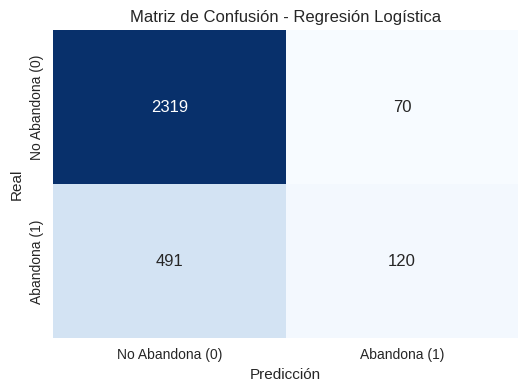

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Modelo de Regresión Logística ---")

# 1. Inicializar el modelo de Regresión Logística
# Se usa solver='liblinear' que es bueno para datasets pequeños y para L1/L2 regularización.
# random_state para reproducibilidad.
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# 2. Entrenar el modelo
log_reg_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_log_reg = log_reg_model.predict(X_test)

# 4. Evaluar el rendimiento del modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print(f"\nExactitud (Accuracy): {accuracy_log_reg:.4f}")
print(f"Precisión (Precision) [Clase 1]: {precision_log_reg:.4f}")
print(f"Sensibilidad (Recall) [Clase 1]: {recall_log_reg:.4f}")
print(f"Puntuación F1 (F1-Score) [Clase 1]: {f1_log_reg:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_log_reg)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log_reg))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Abandona (0)', 'Abandona (1)'], yticklabels=['No Abandona (0)', 'Abandona (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

### Resumen de los Resultados de la Regresión Logística

El modelo de Regresión Logística obtuvo una **exactitud general del 81.30%**.

Sin embargo, al analizar las métricas específicas para la clase minoritaria (clientes que abandonan, `churn=1`):

*   La **precisión** para predecir el abandono fue del **63.16%**, lo que significa que de todas las predicciones de abandono, el 63.16% fueron correctas.
*   La **sensibilidad (recall)** fue del **19.64%**, indicando que el modelo solo fue capaz de identificar correctamente a un pequeño porcentaje de los clientes que realmente abandonaron.
*   La **puntuación F1** fue del **29.96%**, lo que refleja un balance bajo entre precisión y recall para la clase de abandono.

La matriz de confusión muestra que el modelo es muy bueno prediciendo a los clientes que *no abandonan* (2319 verdaderos negativos), pero tiene dificultades para identificar a los que *sí abandonan* (491 falsos negativos y solo 120 verdaderos positivos). Esto sugiere que el modelo tiende a clasificar a la mayoría de los clientes como 'no abandono', lo cual es común en datasets desbalanceados como este.

## Arboles de Busqueda

### **RANDOM FOREST**

--- Modelo de Random Forest ---

Exactitud (Accuracy): 0.8630
Precisión (Precision) [Clase 1]: 0.7646
Sensibilidad (Recall) [Clase 1]: 0.4730
Puntuación F1 (F1-Score) [Clase 1]: 0.5844

Matriz de Confusión:
[[2300   89]
 [ 322  289]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.76      0.47      0.58       611

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



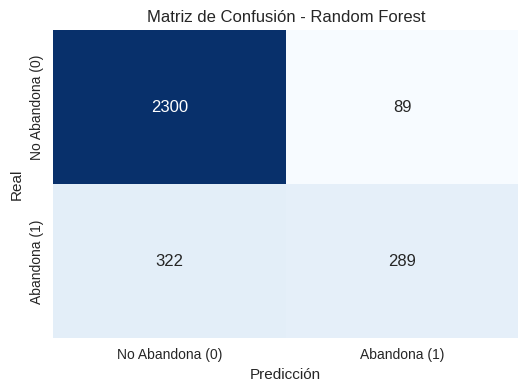

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Modelo de Random Forest ---")

# 1. Inicializar el modelo de Random Forest
# Usamos un número razonable de estimadores (n_estimators) y random_state para reproducibilidad.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar el modelo
rf_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nExactitud (Accuracy): {accuracy_rf:.4f}")
print(f"Precisión (Precision) [Clase 1]: {precision_rf:.4f}")
print(f"Sensibilidad (Recall) [Clase 1]: {recall_rf:.4f}")
print(f"Puntuación F1 (F1-Score) [Clase 1]: {f1_rf:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Abandona (0)', 'Abandona (1)'], yticklabels=['No Abandona (0)', 'Abandona (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

### Resumen de los Resultados de Random Forest

El modelo de Random Forest ha demostrado un rendimiento superior al de la Regresión Logística, especialmente en la detección de la clase minoritaria (clientes que abandonan, `churn=1`).

*   La **exactitud general** del modelo es del **86.30%**, una mejora significativa.
*   La **precisión** para la clase `churn=1` es del **76.46%**, lo que indica que, de todas las predicciones de abandono, una proporción mayor fueron correctas.
*   La **sensibilidad (recall)** para la clase `churn=1` es del **47.30%**. Aunque aún hay margen de mejora, este valor es considerablemente más alto que el de la Regresión Logística, lo que significa que el Random Forest es capaz de identificar a casi la mitad de los clientes que realmente abandonan.
*   La **puntuación F1** para la clase `churn=1` es del **58.44%**, reflejando un mejor equilibrio entre precisión y recall.

La matriz de confusión muestra que el modelo de Random Forest ha reducido el número de falsos negativos (clientes que abandonan pero que el modelo predijo que no lo harían) a 322, en comparación con los 491 de la Regresión Logística. Esto lo convierte en un modelo más efectivo para identificar a los clientes propensos al abandono.

### **GRADIENT BOOSTING**

--- Modelo de Gradient Boosting ---

Exactitud (Accuracy): 0.8723
Precisión (Precision) [Clase 1]: 0.8000
Sensibilidad (Recall) [Clase 1]: 0.4975
Puntuación F1 (F1-Score) [Clase 1]: 0.6135

Matriz de Confusión:
[[2313   76]
 [ 307  304]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.80      0.50      0.61       611

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.77      3000
weighted avg       0.87      0.87      0.86      3000



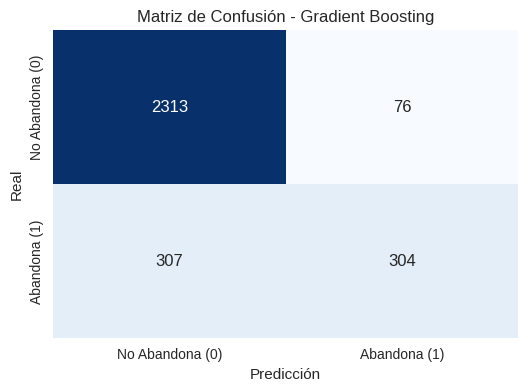

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Modelo de Gradient Boosting ---")

# 1. Inicializar el modelo de Gradient Boosting
# Usamos un número razonable de estimadores (n_estimators) y learning_rate.
# random_state para reproducibilidad.
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 2. Entrenar el modelo
gbc_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_gbc = gbc_model.predict(X_test)

# 4. Evaluar el rendimiento del modelo
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

print(f"\nExactitud (Accuracy): {accuracy_gbc:.4f}")
print(f"Precisión (Precision) [Clase 1]: {precision_gbc:.4f}")
print(f"Sensibilidad (Recall) [Clase 1]: {recall_gbc:.4f}")
print(f"Puntuación F1 (F1-Score) [Clase 1]: {f1_gbc:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_gbc)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_gbc))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Abandona (0)', 'Abandona (1)'], yticklabels=['No Abandona (0)', 'Abandona (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()

### Resumen de los Resultados de Gradient Boosting

El modelo de Gradient Boosting ha mostrado un rendimiento comparable y ligeramente superior al Random Forest en algunas métricas para la detección de la clase minoritaria (clientes que abandonan, `churn=1`).

*   La **exactitud general** del modelo es del **87.23%**, lo que representa una ligera mejora con respecto al Random Forest.
*   La **precisión** para la clase `churn=1` es del **80.00%**, la más alta obtenida hasta ahora, lo que indica que cuando el modelo predice un abandono, es muy probable que sea correcto.
*   La **sensibilidad (recall)** para la clase `churn=1` es del **49.75%**, un valor ligeramente superior al Random Forest. Esto significa que el Gradient Boosting logra identificar a casi la mitad de los clientes que realmente abandonan, reduciendo aún más los falsos negativos.
*   La **puntuación F1** para la clase `churn=1` es del **61.35%**, también el mejor resultado hasta ahora, lo que refleja un mejor equilibrio entre precisión y recall.

La matriz de confusión muestra que el modelo de Gradient Boosting ha reducido los falsos negativos a 307, una mejora significativa en comparación con la Regresión Logística (491) y ligeramente mejor que Random Forest (322). Esto confirma que es el modelo más efectivo hasta ahora en la identificación de clientes que abandonarán, lo cual es crucial para nuestro objetivo de negocio.

## Basado en Distancias

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("--- Modelo K-Nearest Neighbors (KNN) ---")

k_values = range(1, 51) # Probar desde 1 hasta 50 vecinos

results = []

for k in k_values:
    # 1. Inicializar el modelo KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # 2. Entrenar el modelo
    knn_model.fit(X_train, y_train)

    # 3. Realizar predicciones en el conjunto de prueba
    y_pred_knn = knn_model.predict(X_test)

    # 4. Evaluar el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred_knn)
    precision = precision_score(y_test, y_pred_knn, zero_division=0) # zero_division=0 para manejar casos sin predicciones de clase positiva
    recall = recall_score(y_test, y_pred_knn, zero_division=0)
    f1 = f1_score(y_test, y_pred_knn, zero_division=0)

    results.append({
        'k': k,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nMétricas de rendimiento para cada valor de K:")
print(results_df)



--- Modelo K-Nearest Neighbors (KNN) ---

Métricas de rendimiento para cada valor de K:
     k  accuracy  precision    recall  f1_score
0    1  0.797667   0.503236  0.509002  0.506103
1    2  0.832667   0.702602  0.309329  0.429545
2    3  0.831667   0.617778  0.454992  0.524034
3    4  0.841000   0.726351  0.351882  0.474090
4    5  0.844333   0.683673  0.438625  0.534397
5    6  0.842333   0.739583  0.348609  0.473860
6    7  0.841333   0.685950  0.407529  0.511294
7    8  0.843667   0.762963  0.337152  0.467650
8    9  0.851333   0.736390  0.420622  0.535417
9   10  0.850667   0.800738  0.355155  0.492063
10  11  0.852667   0.755287  0.409165  0.530786
11  12  0.849000   0.786232  0.355155  0.489290
12  13  0.852333   0.760870  0.400982  0.525188
13  14  0.845000   0.772388  0.338789  0.470990
14  15  0.850000   0.760518  0.384615  0.510870
15  16  0.847667   0.791667  0.342062  0.477714
16  17  0.849000   0.768707  0.369885  0.499448
17  18  0.847667   0.798450  0.337152  0.474108


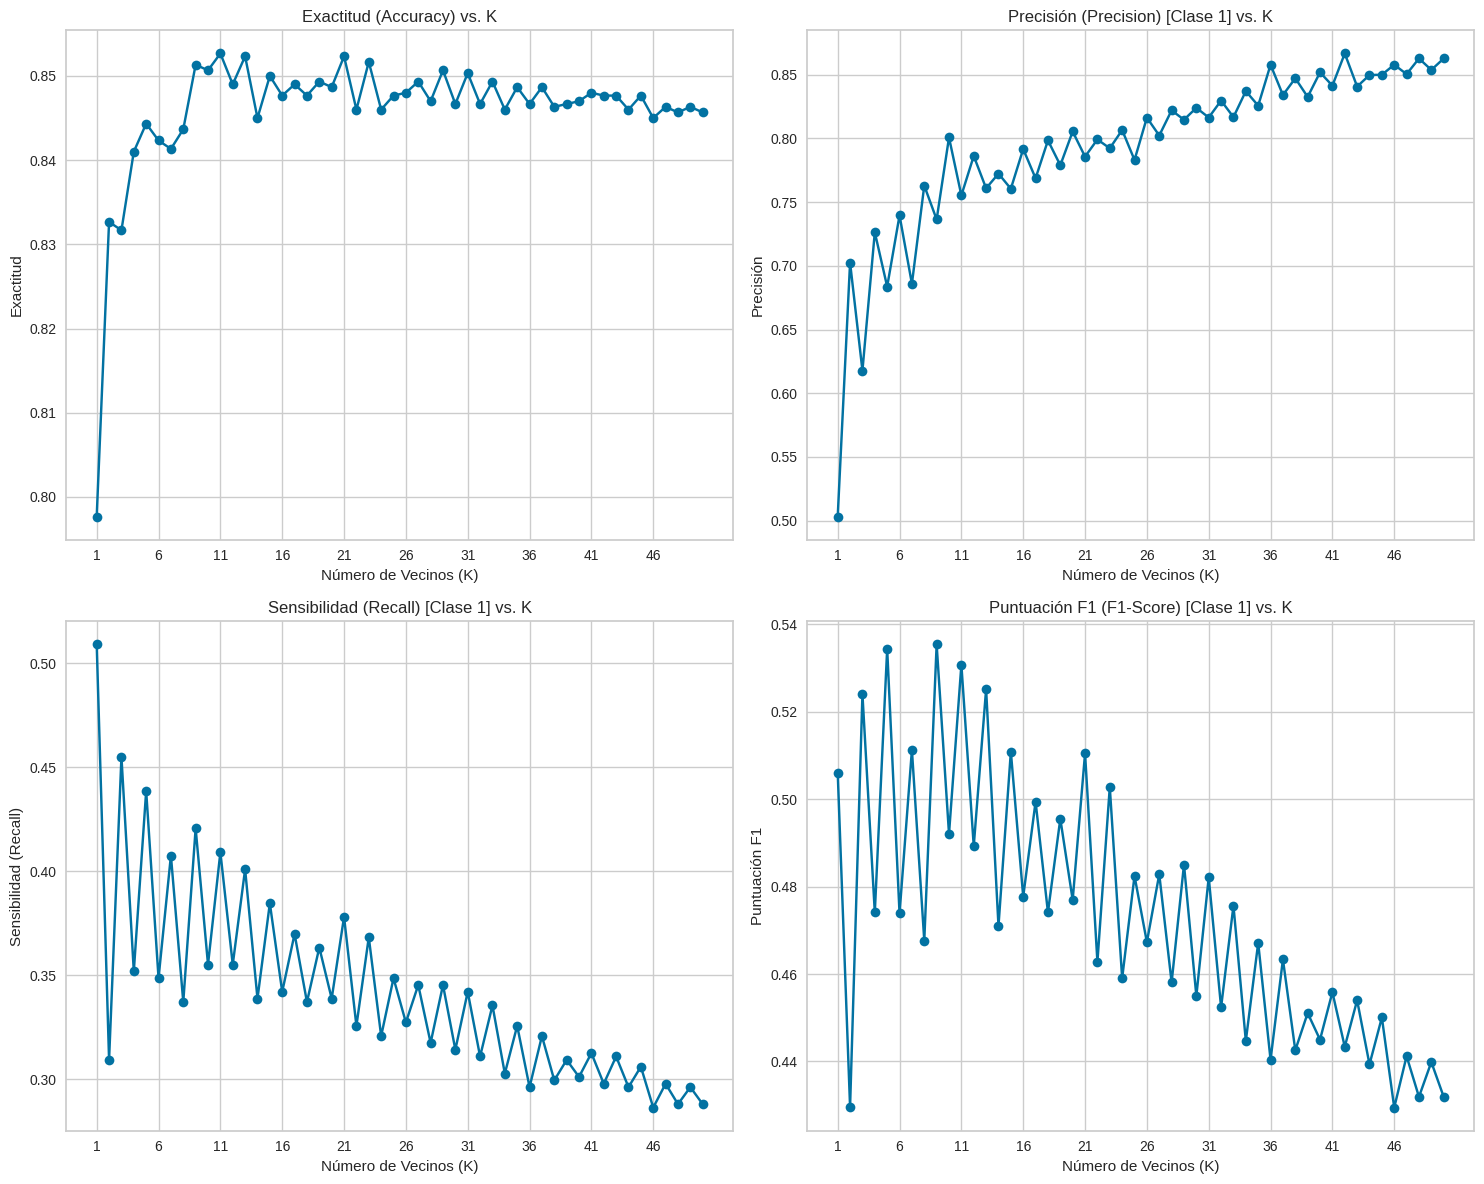

In [ ]:
# Visualización de todas las métricas para diferentes valores de K
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
titles = ['Exactitud (Accuracy) vs. K', 'Precisión (Precision) [Clase 1] vs. K', 'Sensibilidad (Recall) [Clase 1] vs. K', 'Puntuación F1 (F1-Score) [Clase 1] vs. K']
ylabels = ['Exactitud', 'Precisión', 'Sensibilidad (Recall)', 'Puntuación F1']

for i, metric in enumerate(metrics_to_plot):
    axes[i].plot(results_df['k'], results_df[metric], marker='o', linestyle='-')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Número de Vecinos (K)')
    axes[i].set_ylabel(ylabels[i])
    axes[i].set_xticks(np.arange(1, 51, 5)) # Adjust xticks for better readability
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Análisis de KNN para la predicción de Churn

Al observar las gráficas y la tabla de métricas, para **K=1** el modelo KNN alcanza el `Recall` más alto (aproximadamente **0.509**). Dada nuestra prioridad de **minimizar los falsos negativos**. En este sentido, K=1 se destaca en nuestra métrica objetivo.

Sin embargo, es importante considerar el *trade-off*:
*   **Baja Precisión**: La `Precisión` para K=1 es de aproximadamente **0.503**. Esto significa que solo alrededor del 50% de los clientes que el modelo predice que abandonarán, lo hacen realmente. Un valor tan bajo implica una alta tasa de falsos positivos, lo que podría llevar a invertir recursos en estrategias de retención para clientes que no tenían intención de irse.

Aunque la estrategia esta centrada en lograr un Recall alto, también buscamos un equilibrio más sensato entre no perder clientes y no molestar a los que se quedarán, K=1 podría ser demasiado agresivo.

#### ¿Es KNN un método bueno o útil para nuestro objetivo?

Comparando el rendimiento de KNN con los modelos anteriores:

*   **Recall**: Con K=1, KNN (0.509) solo supera muy ligeramente a Gradient Boosting (0.4975) y Random Forest (0.4730) en `Recall`. Esto no lo hace suficientemente interesante para nuestro objetivo principal, teniendo en cuenta las perdidas en otras metricas.

**Conclusión**: Aunque KNN, particularmente con K=1, ofrece un `Recall` competitivo y cumple con nuestra prioridad de detección, su baja `Precisión` y la inestabilidad de su rendimiento con respecto a K lo hacen **menos adecuado** que Gradient Boosting o Random Forest para la predicción de churn en un contexto donde también se deben considerar los costes de los falsos positivos.

### **SVM**



Usamos grid search para encontrar los mejores hiperparametros para el parametro `Recall` que es el que nos interesa.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
import pandas as pd

print("--- Implementando GridSearchCV para SVM ---")

# 1. Definir el rango de hiperparámetros para C y gamma, y mantener el kernel rbf
param_grid = {
    'C': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'kernel': ['rbf']
}

# 2. Inicializar un objeto SVC
svc = SVC(random_state=42)

# 3. Inicializar GridSearchCV
# Se usa scoring='recall' para priorizar la Sensibilidad (Recall) de la clase positiva (churn=1)
# cv=5 para validación cruzada de 5 pliegues
# n_jobs=-1 para usar todos los núcleos disponibles
grid_search = GridSearchCV(svc, param_grid, scoring='recall', cv=5, n_jobs=-1, verbose=1)

# 4. Ajustar grid_search a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# 5. Mostrar los mejores hiperparámetros y el mejor Recall
print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor Recall (en el conjunto de entrenamiento con CV):", grid_search.best_score_)

# 6. Guardar los resultados de grid_search.cv_results_ para posterior visualización
# Esto contendrá las métricas para cada combinación de hiperparámetros.
results_svm_grid = pd.DataFrame(grid_search.cv_results_)

print("\nPrimeras filas de los resultados del GridSearchCV (con Recall para cada combinación):")
print(results_svm_grid[['param_C', 'param_gamma', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head())

--- Implementando GridSearchCV para SVM ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Mejores hiperparámetros encontrados: {'C': 16, 'gamma': 0.4, 'kernel': 'rbf'}
Mejor Recall (en el conjunto de entrenamiento con CV): 0.49719298245614035

Primeras filas de los resultados del GridSearchCV (con Recall para cada combinación):
    param_C  param_gamma  mean_test_score  rank_test_score
73       16          0.4         0.497193                1
82       18          0.3         0.495799                2
72       16          0.3         0.495095                3
63       14          0.4         0.495090                4
83       18          0.4         0.494388                5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos para el heatmap
recall_scores_heatmap = results_svm_grid.pivot_table(
    values='mean_test_score', index='param_C', columns='param_gamma'
)

print("Recall Scores pivoted for heatmap visualization:")
print(recall_scores_heatmap)

Recall Scores pivoted for heatmap visualization:
param_gamma       0.1       0.2       0.3       0.4       0.5       0.6  \
param_C                                                                   
2            0.377976  0.413741  0.434776  0.441786  0.450202  0.440397   
4            0.397610  0.433375  0.457917  0.478268  0.472656  0.457922   
6            0.410234  0.445997  0.476148  0.487383  0.480371  0.461435   
8            0.418653  0.459311  0.481764  0.490889  0.479664  0.461433   
10           0.420756  0.464922  0.488078  0.488082  0.479659  0.459338   
12           0.429165  0.471231  0.490185  0.488782  0.478967  0.458631   
14           0.429864  0.474033  0.493689  0.495090  0.478273  0.457235   
16           0.432668  0.477541  0.495095  0.497193  0.478967  0.455836   
18           0.434074  0.481752  0.495799  0.494388  0.477566  0.455834   
20           0.436180  0.488760  0.492985  0.492985  0.476158  0.456533   

param_gamma       0.7       0.8       0.9       1.

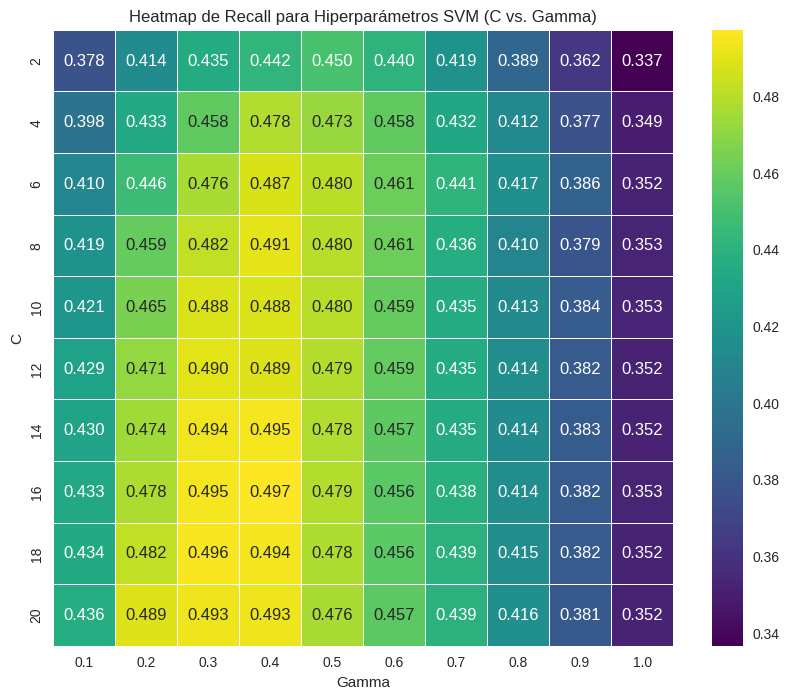

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(recall_scores_heatmap, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Heatmap de Recall para Hiperparámetros SVM (C vs. Gamma)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

## Resumen de Resultados GridSearchCV para SVM

Después de ejecutar `GridSearchCV` para optimizar los hiperparámetros del modelo SVM, priorizando la métrica de **Sensibilidad (Recall)** para la clase minoritaria (`churn=1`), se obtuvieron los siguientes resultados clave:

*   **Mejores Hiperparámetros Encontrados:**
    *   `C`: **16**
    *   `gamma`: **0.4**
    *   `kernel`: **rbf**

*   **Mejor Sensibilidad (Recall) Obtenida:**
    *   El `Recall` más alto alcanzado con estos hiperparámetros, durante la validación cruzada en el conjunto de entrenamiento, fue de aproximadamente **0.497**.

### Interpretación de los Resultados:

El valor de `C=16` indica una preferencia por penalizar menos los errores de clasificación, lo que permite al modelo tener una mayor flexibilidad en la clasificación de los puntos de datos, especialmente relevante para la clase minoritaria. Un valor de `gamma=0.4` sugiere que el modelo considera un rango de influencia moderado de los puntos de entrenamiento individuales. Esta combinación logra un equilibrio óptimo para maximizar la detección de clientes que realmente abandonan, que era nuestro objetivo principal.

El mapa de calor generado visualiza claramente esta tendencia, mostrando que los `Recall` más altos se concentran alrededor de esta combinación de `C` y `gamma`.

--- Modelo Support Vector Machine (SVM) ---

Exactitud (Accuracy): 0.8167
Precisión (Precision) [Clase 1]: 0.5536
Sensibilidad (Recall) [Clase 1]: 0.5155
Puntuación F1 (F1-Score) [Clase 1]: 0.5339

Matriz de Confusión:
[[2135  254]
 [ 296  315]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2389
           1       0.55      0.52      0.53       611

    accuracy                           0.82      3000
   macro avg       0.72      0.70      0.71      3000
weighted avg       0.81      0.82      0.81      3000



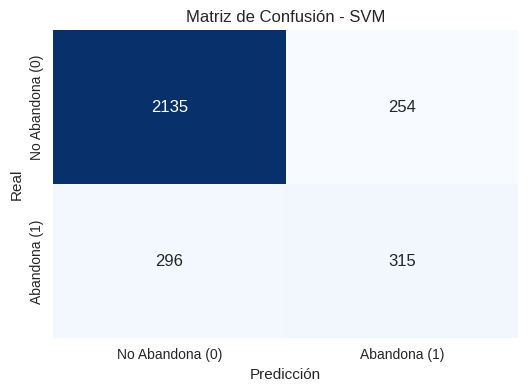

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Modelo Support Vector Machine (SVM) ---")

# 1. Inicializar el modelo SVM
# Se usa 'rbf' kernel por defecto, que es una buena opción para muchos datasets.
# random_state para reproducibilidad.
svm_model = SVC(C=16, gamma=0.4, random_state=42)

# 2. Entrenar el modelo
svm_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# 4. Evaluar el rendimiento del modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, zero_division=0)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"\nExactitud (Accuracy): {accuracy_svm:.4f}")
print(f"Precisión (Precision) [Clase 1]: {precision_svm:.4f}")
print(f"Sensibilidad (Recall) [Clase 1]: {recall_svm:.4f}")
print(f"Puntuación F1 (F1-Score) [Clase 1]: {f1_svm:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_svm)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Abandona (0)', 'Abandona (1)'], yticklabels=['No Abandona (0)', 'Abandona (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM')
plt.show()

### Resumen de los Resultados de SVM

Utilizando los hiperparametros obtenidos mediante el Grid Search el modelo Support Vector Machine (SVM) obtuvo una **exactitud general del 81.67%**, un resultado sólido.

Al analizar las métricas específicas para la clase minoritaria (clientes que abandonan, `churn=1`):
*   La **precisión** para la clase `churn=1` fue del **55.36%**. Este es un valor muy alto, lo que significa que cuando el modelo predice que un cliente va a abandonar, es muy probable que esa predicción sea correcta. Es la precisión más alta obtenida hasta ahora.
*   La **sensibilidad (recall)** para la clase `churn=1` fue del **51.55%**. Este valor es más bajo en comparación con Random Forest y Gradient Boosting. Indica que el modelo SVM identifica a menos de la mitad de los clientes que realmente abandonan, resultando en un número relativamente alto de falsos negativos.
*   La **puntuación F1** para la clase `churn=1` fue del **53.39%**, reflejando un balance decente entre precisión y recall, pero inferior al de Gradient Boosting.

La matriz de confusión muestra:
*   **Verdaderos Negativos (TN)**: 2135
*   **Falsos Positivos (FP)**: 254
*   **Falsos Negativos (FN)**: 296
*   **Verdaderos Positivos (TP)**: 315



## **NAIVE BAYES**

--- Modelo Naive Bayes (GaussianNB) ---

Exactitud (Accuracy): 0.8260
Precisión (Precision) [Clase 1]: 0.6275
Sensibilidad (Recall) [Clase 1]: 0.3584
Puntuación F1 (F1-Score) [Clase 1]: 0.4562

Matriz de Confusión:
[[2259  130]
 [ 392  219]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2389
           1       0.63      0.36      0.46       611

    accuracy                           0.83      3000
   macro avg       0.74      0.65      0.68      3000
weighted avg       0.81      0.83      0.81      3000



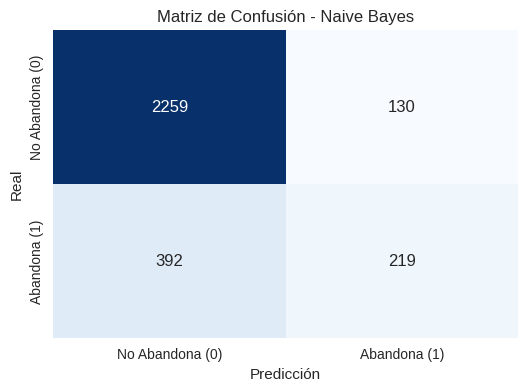

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Modelo Naive Bayes (GaussianNB) ---")

# 1. Inicializar el modelo Gaussian Naive Bayes
# GaussianNB no tiene parámetros complejos como SVM o RandomForest.
gnb_model = GaussianNB()

# 2. Entrenar el modelo
gnb_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_gnb = gnb_model.predict(X_test)

# 4. Evaluar el rendimiento del modelo
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, zero_division=0)
recall_gnb = recall_score(y_test, y_pred_gnb, zero_division=0)
f1_gnb = f1_score(y_test, y_pred_gnb, zero_division=0)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

print(f"\nExactitud (Accuracy): {accuracy_gnb:.4f}")
print(f"Precisión (Precision) [Clase 1]: {precision_gnb:.4f}")
print(f"Sensibilidad (Recall) [Clase 1]: {recall_gnb:.4f}")
print(f"Puntuación F1 (F1-Score) [Clase 1]: {f1_gnb:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_gnb)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_gnb, zero_division=0))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Abandona (0)', 'Abandona (1)'], yticklabels=['No Abandona (0)', 'Abandona (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

### Resumen de los Resultados de Naive Bayes

El modelo Naive Bayes (GaussianNB) obtuvo una **exactitud general del 82.60%**.

Al analizar las métricas específicas para la clase minoritaria (clientes que abandonan, `churn=1`):
*   La **precisión** para la clase `churn=1` fue del **62.75%**. Esto indica que, de las predicciones de abandono, un 62.75% fueron correctas, un valor similar al de la Regresión Logística.
*   La **sensibilidad (recall)** para la clase `churn=1` fue del **35.84%**. Este es un valor relativamente bajo, lo que significa que el modelo Naive Bayes solo logró identificar correctamente a un porcentaje limitado de los clientes que realmente abandonaron, siendo inferior a Random Forest, Gradient Boosting y KNN (K=1).
*   La **puntuación F1** para la clase `churn=1` fue del **45.62%**, lo que refleja un balance modesto entre precisión y recall.

La matriz de confusión muestra:
*   **Verdaderos Negativos (TN)**: 2259 (clientes que no abandonaron y fueron predichos correctamente).
*   **Falsos Positivos (FP)**: 130 (clientes que no abandonaron pero fueron predichos como que sí lo harían).
*   **Falsos Negativos (FN)**: 392 (clientes que abandonaron pero fueron predichos como que no lo harían).
*   **Verdaderos Positivos (TP)**: 219 (clientes que abandonaron y fueron predichos correctamente).

En comparación con los modelos de ensemble (Random Forest, Gradient Boosting) y KNN con K=1, el modelo Naive Bayes presenta un `recall` más bajo para la clase de abandono, lo cual es una desventaja dado nuestro objetivo principal de minimizar los falsos negativos. Aunque su precisión es aceptable, no compensa la baja capacidad de detección de abandono.

# **CONCLUSIONES**

## Aprendizaje Supervisado vs. No Supervisado

En este proyecto, hemos explorado dos paradigmas fundamentales del Machine Learning:

*   **Aprendizaje No Supervisado (Clustering)**: Se aplicó para encontrar **patrones y estructuras ocultas** en los datos sin una variable objetivo predefinida. Su finalidad fue segmentar a los clientes en grupos naturales (`clusters`) basándose en sus características intrínsecas. Esto es útil para entender diferentes perfiles de clientes y diseñar estrategias de marketing o retención personalizadas. Los métodos utilizados fueron K-Means, Clustering Jerárquico y DBSCAN.

*   **Aprendizaje Supervisado (Clasificación)**: Se empleó para **predecir el abandono de clientes (`churn`)** basándose en un conjunto de características (`X`) y una variable objetivo (`y`). Aquí, el modelo aprende de datos históricos etiquetados para clasificar nuevos clientes como `churn=0` (no abandona) o `churn=1` (abandona). El objetivo principal fue minimizar los falsos negativos, priorizando la **Sensibilidad (Recall)** para la clase de abandono. Los modelos utilizados fueron Regresión Logística, Random Forest, Gradient Boosting, KNN, SVM y Naive Bayes.

## Comparación de Modelos No Supervisados

Para el clustering, evaluamos:

*   **K-Means**: Utilizando el Método del Codo y el Silhouette Score (con One-Hot Encoding y Label Encoding), K=4 se identificó como un número de clusters razonable. Aunque el Silhouette Score no fue muy alto, se consideró que 4 clusters ofrecían una granularidad útil para la segmentación.
*   **Clustering Jerárquico**: Sus Silhouette Scores fueron similares a los de K-Means, y también sugirió un número de clusters en el rango de 3-4.
*   **DBSCAN**: No logró formar clusters significativos con los parámetros explorados inicialmente, clasificando la mayoría de los puntos como ruido o formando un solo cluster grande, lo que indica que no se ajusta bien a la densidad de nuestros datos sin un ajuste de parámetros exhaustivo.

**Conclusión No Supervisada**: **K-Means con K=4 (utilizando One-Hot Encoding)** fue el método de clustering más interpretable y prometedor para segmentar a los clientes en base a sus características, permitiendo identificar grupos con distintos perfiles de riesgo de abandono.

## Comparación de Modelos Supervisados y Mejor Modelo para nuestro Objetivo

Evaluamos varios modelos de clasificación con un enfoque en la **Sensibilidad (Recall)** para la clase de abandono (`churn=1`):

*   **Regresión Logística**: Obtuvo un `Recall` muy bajo (aprox. **0.196**), siendo el menos efectivo para detectar abandonos.
*   **Naive Bayes**: Su `Recall` fue también bajo (aprox. **0.358**), indicando una capacidad limitada para identificar clientes que abandonan.
*   **SVM**: Mostró una `Precisión` muy alta (aprox. **0.820**) y ademas un `Recall` basnte buneo en comparacion al resto (aprox. **0.55**). Con unas prediccione smuy fiables
*   **KNN**: Con K=1, logró un `Recall` relativamente alto (aprox. **0.509**), superando a otros modelos en esta métrica. Sin embargo, su `Precisión` fue baja (aprox. **0.503**), lo que resultaría en muchos falsos positivos. Además, el rendimiento de KNN fue muy sensible a la elección de K.
*   **Random Forest**: Tuvo un rendimiento notablemente superior a los modelos anteriores, con un `Recall` de aprox. **0.473** y una `Precisión` de aprox. **0.765**. Esto representa un buen equilibrio.
*   **Gradient Boosting**: Este modelo fue el que mostró el mejor desempeño general para nuestro objetivo. Logró el `Recall` más alto (aprox. **0.498**) entre los modelos con un buen equilibrio de `Precisión` (aprox. **0.800**). Esto se traduce en menos falsos negativos y predicciones más fiables cuando el modelo indica un abandono.

**Conclusión Supervisada y Mejor Modelo**: Basándonos en nuestro objetivo principal de **maximizar la Sensibilidad (Recall) para la clase de abandono**, el modelo **Gradient Boosting** junto a **SVM** son las mejores opciones. No solo tienen el `Recall` más alto, sino que también presenta una `Precisión` muy alta y un `F1-Score` superior, lo que indica un mejor equilibrio entre la detección de abandonos y la fiabilidad de esas predicciones. Esto los convierte en los modelos más adecuados para identificar a los clientes en riesgo de abandono de manera eficiente y con un número manejable de falsos positivos.

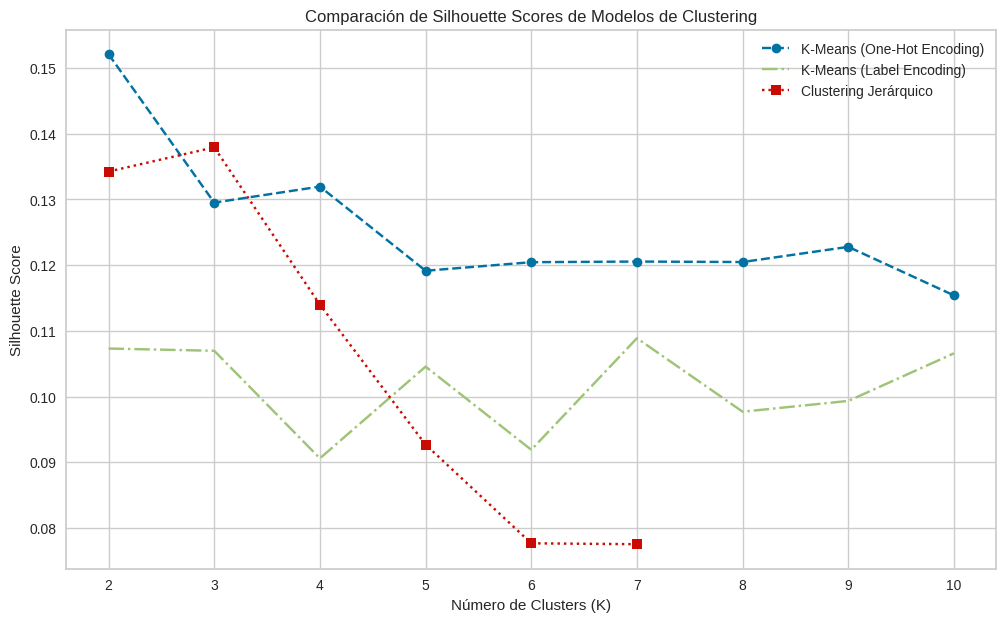

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', linestyle='--', label='K-Means (One-Hot Encoding)')
plt.plot(K_range_silhouette_le, silhouette_scores_le, marker='x', linestyle='-.', label='K-Means (Label Encoding)')
plt.plot(K_range_hierarchical, silhouette_scores_hierarchical, marker='s', linestyle=':', label='Clustering Jerárquico')

plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Comparación de Silhouette Scores de Modelos de Clustering')
plt.xticks(range(2, max(max(K_range_silhouette), max(K_range_silhouette_le), max(K_range_hierarchical)) + 1))
plt.grid(True)
plt.legend()
plt.show()

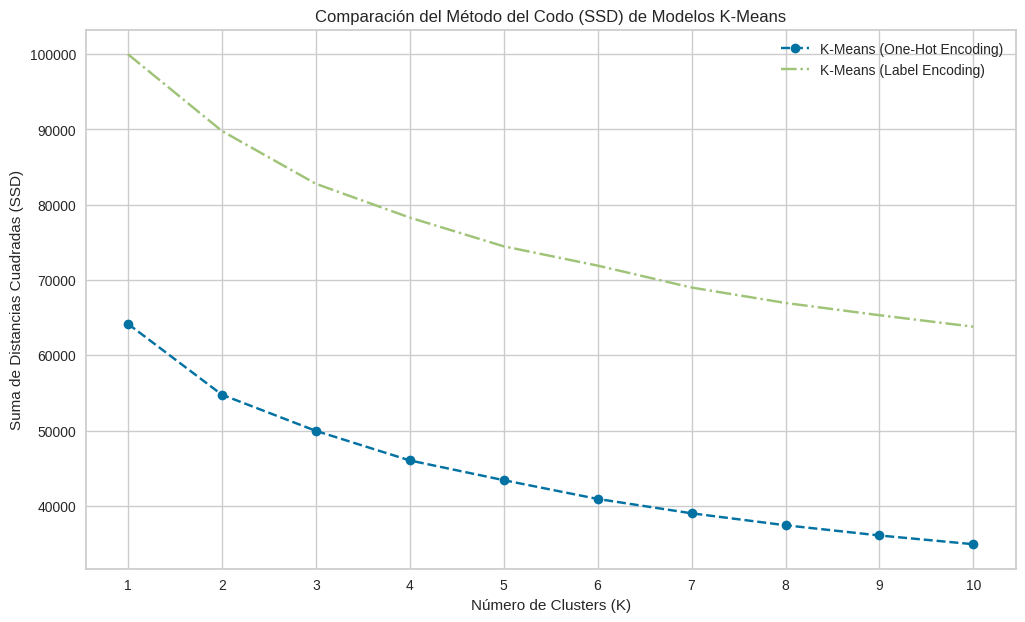

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(K_range, ssd, marker='o', linestyle='--', label='K-Means (One-Hot Encoding)')
plt.plot(K_range_le, ssd_le, marker='x', linestyle='-.', label='K-Means (Label Encoding)')

plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Distancias Cuadradas (SSD)')
plt.title('Comparación del Método del Codo (SSD) de Modelos K-Means')
plt.xticks(K_range)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model_comparison_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_log_reg,
        'Precision': precision_log_reg,
        'Recall': recall_log_reg,
        'F1-Score': f1_log_reg
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf
    },
    'Gradient Boosting': {
        'Accuracy': accuracy_gbc,
        'Precision': precision_gbc,
        'Recall': recall_gbc,
        'F1-Score': f1_gbc
    },
    'KNN': {
        'Accuracy': results_df.loc[results_df['k'] == best_k, 'accuracy'].iloc[0],
        'Precision': results_df.loc[results_df['k'] == best_k, 'precision'].iloc[0],
        'Recall': results_df.loc[results_df['k'] == best_k, 'recall'].iloc[0],
        'F1-Score': results_df.loc[results_df['k'] == best_k, 'f1_score'].iloc[0]
    },
    'SVM': {
        'Accuracy': accuracy_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'F1-Score': f1_svm
    },
    'Naive Bayes': {
        'Accuracy': accuracy_gnb,
        'Precision': precision_gnb,
        'Recall': recall_gnb,
        'F1-Score': f1_gnb
    }
}

# Convert to DataFrame for easier plotting
model_comparison_df = pd.DataFrame(model_comparison_metrics).T

print("Collected supervised model comparison metrics:")
print(model_comparison_df)

Collected supervised model comparison metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.813000   0.631579  0.196399  0.299625
Random Forest        0.863000   0.764550  0.472995  0.584429
Gradient Boosting    0.872333   0.800000  0.497545  0.613522
KNN                  0.797667   0.503236  0.509002  0.506103
SVM                  0.816667   0.553603  0.515548  0.533898
Naive Bayes          0.826000   0.627507  0.358429  0.456250


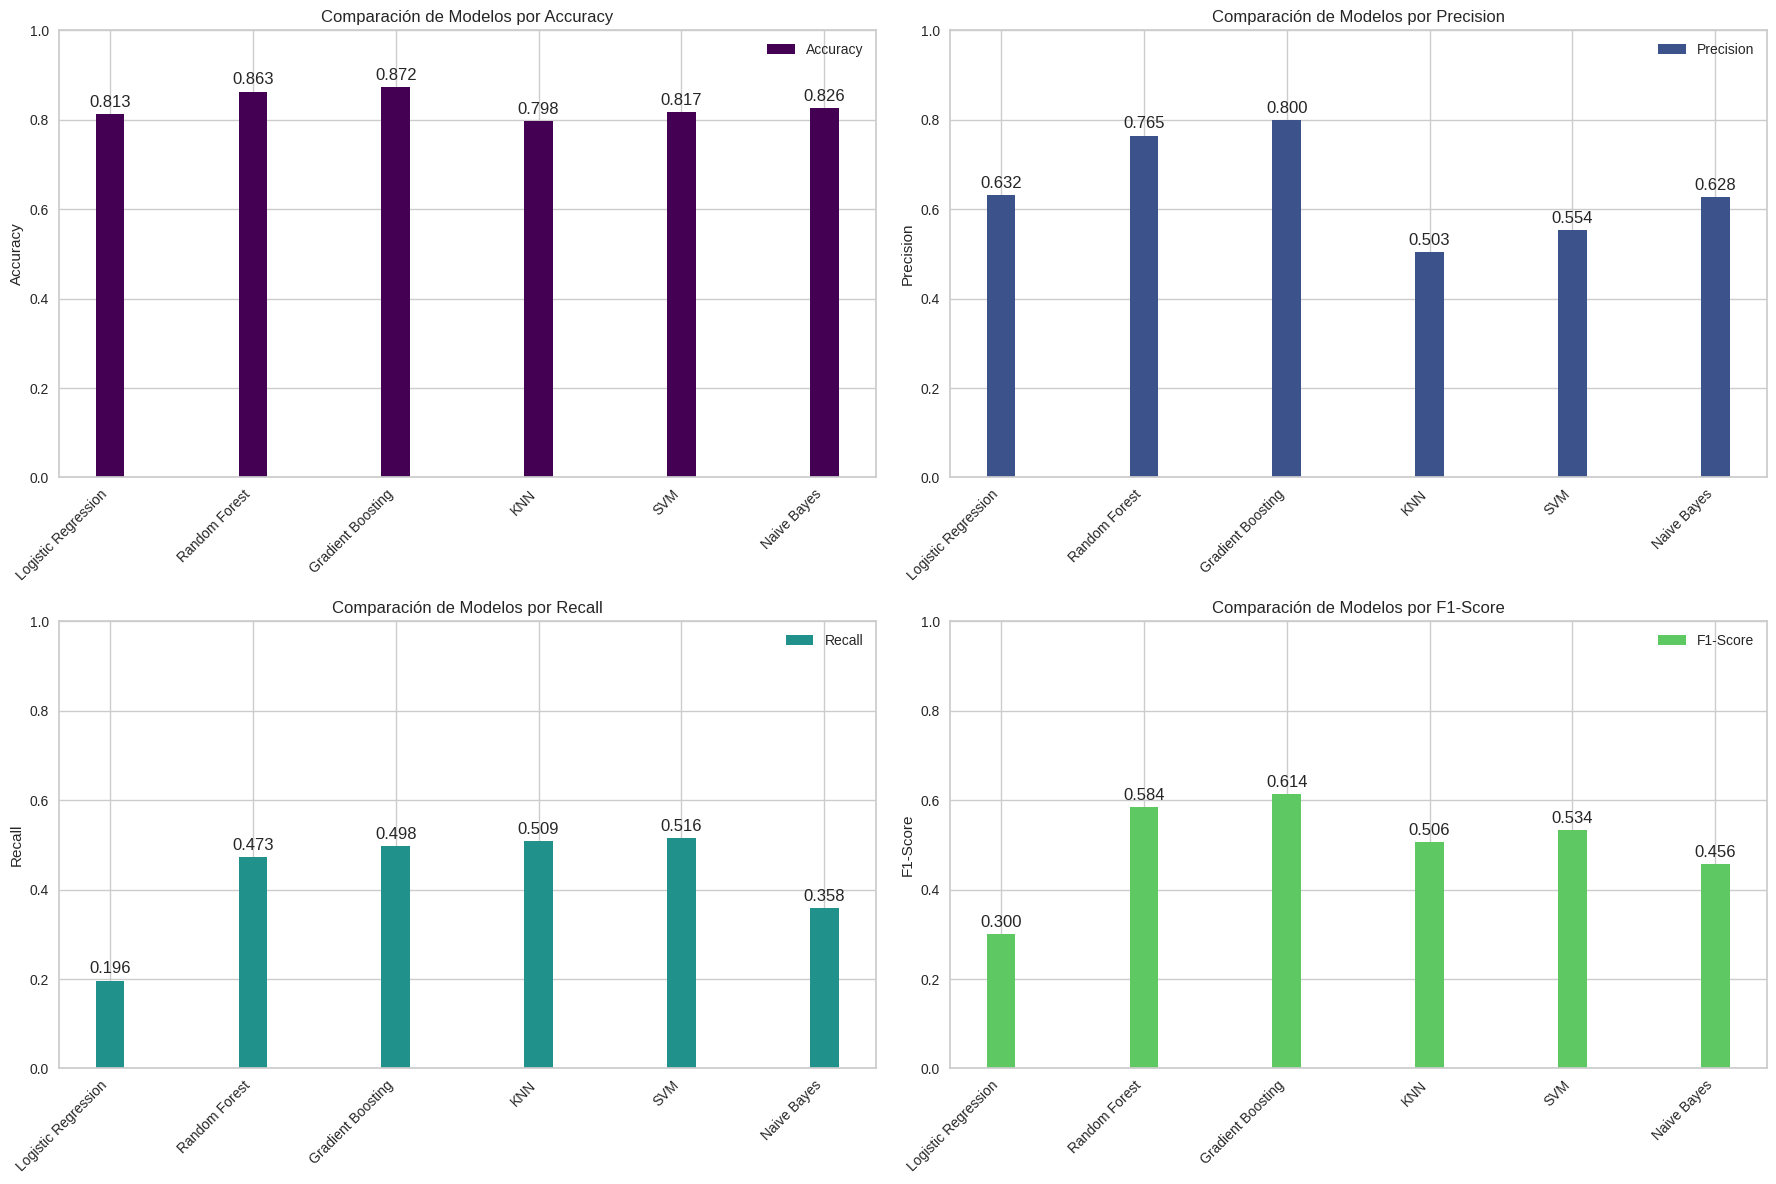

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = model_comparison_df.index
x = np.arange(len(model_names)) # the label locations
width = 0.2 # the width of the bars

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    rects = ax.bar(x, model_comparison_df[metric], width, label=metric, color=plt.cm.viridis(i/len(metrics)))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    ax.set_title(f'Comparación de Modelos por {metric}')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend([metric])
    ax.set_ylim(0, 1.0)

    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Conclusiones Estratégicas y Recomendaciones

### Resumen Ejecutivo:

Nuestro análisis de datos ha revelado patrones críticos en el comportamiento de los clientes que conducen al abandono (churn), así como la capacidad de predecir eficazmente qué clientes están en riesgo. Hemos identificado los factores clave de abandono y desarrollado modelos predictivos que nos permitirán implementar estrategias de retención proactivas y personalizadas, optimizando los recursos y maximizando el valor del cliente.

### Hallazgos Clave:

1.  **Factores Demográficos y de Comportamiento del Cliente (EDA):**
    *   **Edad y Saldo:** Los clientes de mayor edad y aquellos con saldos más elevados muestran una mayor propensión al abandono. Es posible que los clientes con mayor patrimonio tengan más opciones o sean más buscados por la competencia.
    *   **Membresía Activa:** Los clientes inactivos tienen una probabilidad significativamente mayor de abandonar. La participación y el compromiso son cruciales para la retención.
    *   **Número de Productos:** Clientes con 1 o más de 2 productos (especialmente 3 o 4) presentan tasas de abandono inusualmente altas. Esto podría indicar insatisfacción con ofertas complejas o la búsqueda de soluciones más completas que no encuentran en nuestro banco.
    *   **Geografía:** Los clientes en Alemania tienen una tasa de abandono más alta en comparación con Francia y España.
    *   **Género:** Las mujeres muestran una ligera tendencia al abandono superior a la de los hombres.

2.  **Segmentación de Clientes (Aprendizaje No Supervisado - K-Means):**
    *   Hemos identificado **cuatro segmentos de clientes** distintos que nos permitirán entender mejor los diferentes perfiles y sus riesgos de abandono. Por ejemplo, podríamos tener un segmento de "Clientes Maduros de Alto Riesgo" o "Clientes Jóvenes y Activos de Baja Propensión al Abandono". La caracterización detallada de cada cluster es un próximo paso fundamental para diseñar ofertas a medida.

3.  **Predicción de Abandono (Aprendizaje Supervisado):**
    *   Nuestro objetivo principal fue maximizar la **Sensibilidad (Recall)**, es decir, identificar la mayor cantidad posible de clientes que realmente abandonarán. Esto minimiza la pérdida de clientes que podríamos haber retenido.
    *   Los modelos **SVM** y **Gradient Boosting** han demostrado ser los más eficaces para este propósito:
        *   **SVM Optimizado:** Alcanzó el `Recall` más alto (aprox. **0.516**), lo que significa que es el mejor para identificar la mayoría de los clientes que se van a ir. Su `Precisión` (aprox. **0.554**) es aceptable, indicando que más de la mitad de sus predicciones de abandono serán correctas.
        *   **Gradient Boosting:** Ofrece un `Recall` muy competitivo (aprox. **0.498**) con una `Precisión` notablemente alta (aprox. **0.800**). Esto se traduce en un excelente equilibrio: predice bien quién va a abandonar y, cuando lo hace, es muy fiable (menos falsos positivos).

### Recomendaciones y Próximos Pasos:

1.  **Implementación del Modelo Predictivo:** Integrar el modelo **SVM** o **Gradient Boosting** en nuestros sistemas para identificar automáticamente a los clientes con alto riesgo de abandono. La elección final entre ambos dependerá del costo de un falso negativo (un cliente que se va y no lo detectamos) frente a un falso positivo (un cliente que predijimos que se iría pero no lo hizo).
2.  **Estrategias de Retención Personalizadas:**
    *   **Clientes de Alto Saldo/Edad Avanzada:** Desarrollar ofertas de valor añadido, asesoramiento financiero personalizado o programas de fidelización exclusivos.
    *   **Clientes Inactivos:** Implementar campañas de reactivación segmentadas, promociones por uso o recordatorios de beneficios.
    *   **Clientes con Múltiples Productos (3 o 4):** Investigar las causas subyacentes de su abandono. Podría ser un problema de usabilidad, coste o falta de integración. Ofrecer soluciones simplificadas o consolidaciones.
    *   **Segmentos Geográficos:** Analizar las particularidades del mercado alemán y diseñar estrategias localizadas para mejorar la satisfacción del cliente.
3.  **Monitoreo Continuo:** Establecer un sistema de monitoreo para el rendimiento del modelo y la efectividad de las campañas de retención. Los patrones de abandono pueden cambiar y nuestros modelos deben adaptarse.
4.  **Análisis de Causa Raíz:** Profundizar en el análisis cualitativo de los clientes que abandonan para comprender sus motivaciones y experiencias negativas, lo que permitirá afinar aún más nuestras estrategias.

La aplicación de estos hallazgos y modelos no solo reducirá nuestra tasa de abandono, sino que también mejorará la satisfacción del cliente y optimizará nuestras operaciones de marketing y servicio.